In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def displayall(_, col=99, row=999):
    pd.options.display.max_columns = col
    pd.options.display.max_rows = row
    display(_)
    display(_.shape)
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 60

In [3]:
gpb = pd.read_csv("./LDC_Intellinx_40000-hashed.csv", sep=";", error_bad_lines=False, encoding="cp1251")
gpb.head()

b'Skipping line 916: expected 23 fields, saw 24\n'


,EntryID,Data_devicetype,Data_devicename,Data_label,Data_path,Data_processname,Data_other,Data_reason,Data_uniqueid,Data_modelid,...,Data_targetcomptr,Data_target,Data_audittype,LocalDateTime,TransferredDate,ComputerName,ActionName,UserSID,NTUserName,ADUserName
0,423700000,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,NaN,NaN,2017-01-17 09:46:43,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,READ-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c
1,423700001,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,NaN,NaN,2017-01-17 09:46:34,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c
2,423700002,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,NaN,NaN,2017-01-17 09:43:05,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c
3,423700003,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,NaN,NaN,2017-01-17 09:47:02,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c
4,423700004,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,NaN,NaN,2017-01-17 09:31:06,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c


In [4]:
path = gpb['Data_path'].str.split(pat=r'[/\\\.]')
gpb['ext'] = path.map(lambda x: x if type(x) != list else x[-1].lower() if len(x[-1]) < 6 else "no_ext")
gpb['path'] = path.map(lambda x: x if type(x) != list else x[:-1] if len(x) >1 else x)

In [2]:
gpb.columns

NameError: name 'gpb' is not defined

In [6]:
gpb.groupby('Data_devicetype').count()

,EntryID,Data_devicename,Data_label,Data_path,Data_processname,Data_other,Data_reason,Data_uniqueid,Data_modelid,Data_filesize,...,Data_targetcomptr,Data_target,Data_audittype,LocalDateTime,TransferredDate,ComputerName,ActionName,UserSID,NTUserName,ADUserName
Data_devicetype,,,,,,,,,,,,,,,,,,,,,
Biometric,8,8,8,0,3,5,3,8,8,0,...,0,0,0,8,8,8,8,8,8,8
CD,1364,1364,1364,831,199,526,199,721,736,641,...,0,0,0,1364,1364,1364,1364,1364,1364,1364
COM,1621,1621,1621,0,0,1212,0,1212,1212,409,...,0,0,0,1621,1621,1621,1621,1621,1621,1621
Floppy,3795,3795,3795,3718,3565,77,3565,3723,3795,153,...,0,0,0,3795,3795,3795,3795,3795,3795,3795
LPT,52,52,52,0,0,52,0,52,52,0,...,0,0,0,52,52,52,52,52,52,52
Modem,56,56,56,0,23,34,23,53,55,1,...,0,0,0,56,56,56,56,56,56,56
NEM,24,24,24,0,5,5,5,24,24,0,...,0,0,0,24,24,24,24,24,24,24
PS2,427,427,427,0,0,427,0,427,427,0,...,0,0,0,427,427,427,427,427,427,427
Removable,18266,18266,18266,17458,1376,5270,1376,18153,18193,16083,...,0,0,0,18266,18266,18266,18266,18266,18266,18266


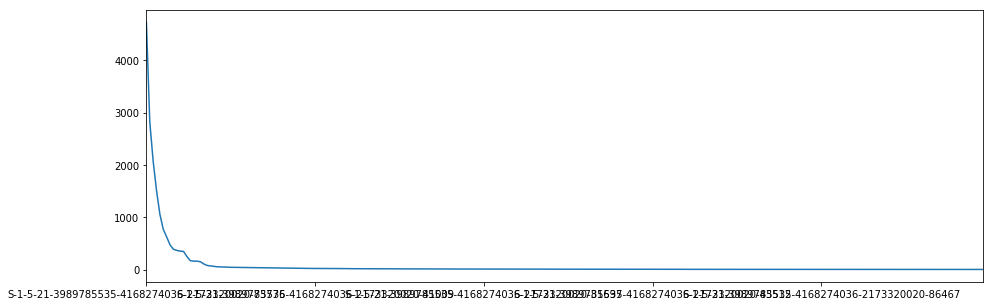

S-1-5-21-3989785535-4168274036-2173320020-73776    4723
S-1-5-21-3989785535-4168274036-2173320020-4415     2824
S-1-5-21-3989785535-4168274036-2173320020-86715    2077
S-1-5-21-3989785535-4168274036-2173320020-15220    1514
S-1-5-21-3989785535-4168274036-2173320020-31967    1057
S-1-5-21-3989785535-4168274036-2173320020-10740     772
S-1-5-21-3989785535-4168274036-2173320020-29115     626
S-1-5-21-3989785535-4168274036-2173320020-86330     474
S-1-5-21-3989785535-4168274036-2173320020-1156      390
S-1-5-21-3989785535-4168274036-2173320020-10160     368
S-1-5-21-3989785535-4168274036-2173320020-31861     354
S-1-5-21-3989785535-4168274036-2173320020-10163     348
S-1-5-21-3989785535-4168274036-2173320020-13676     252
S-1-5-21-3989785535-4168274036-2173320020-59450     172
S-1-5-21-3989785535-4168274036-2173320020-15291     163
S-1-5-21-3989785535-4168274036-2173320020-34142     162
S-1-5-19                                            151
S-1-5-21-3989785535-4168274036-2173320020-34349 

In [8]:
gpb['UserSID'].value_counts()[1:250].plot(figsize = (15,5))
# plt.semilogy()
plt.show()
gpb['UserSID'].value_counts()[1:250]

SID: S-1-5-18
Название: Локальная система
Описание: Учетная запись службы, используемая операционной системой.

SID: S-1-5-19
Название: Администратор NT
Описание: Локальная служба

SID: S-1-5-20
Название: Администратор NT
Описание: Сетевая служба

SID: S-1-5-21домен-500
Название: Администратор
Описание: Учетная запись администратора системы. По умолчанию только эта запись обеспечивает полный контроль системы.

---
дропаем, поскольку процесс кластеризации предполагает фильтрацию выбросов, которые создают эти запросы свой хучей запросов

In [7]:
gpb[['EntryID','ext']].groupby('ext').count().sort_values('EntryID')

KeyError: "['ext'] not in index"

In [6]:
gpb['path'].map(lambda x: len(x) if type(x) == list else x).value_counts()
gpb[(pd.notnull(gpb['path']))]

,EntryID,Data_devicetype,Data_devicename,Data_label,Data_path,Data_processname,Data_other,Data_reason,Data_uniqueid,Data_modelid,...,Data_audittype,LocalDateTime,TransferredDate,ComputerName,ActionName,UserSID,NTUserName,ADUserName,ext,path
0,423700000,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:46:43,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,READ-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
1,423700001,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:46:34,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
2,423700002,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:43:05,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
3,423700003,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:47:02,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,021,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
4,423700004,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:31:06,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
5,423700005,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:30:21,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
6,423700006,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2103802bae4a8a1c9b46c8161d2ce,2b39803d729853b93b8b3b4788fcbc699afe55b9,...,NaN,2017-01-17 09:30:40,2017-01-17 06:58:09,fc7e3c54c58e7d04487c935e9193d973.fa7153f7ed1cb...,WRITE-GRANTED,S-1-5-21-3989785535-4168274036-2173320020-86330,d452eab9a2298219b333edf83ba2f3b9,977726bfd557ab16fcf8ee68fccf311c,011,"[be292f40d00f9e2ee34c55ad060f5e81, 99073823ec4..."
7,423700007,Removable,7836644dfc6a8daebed30274855a36d7,d41d8cd98f00b204e9800998ecf8427e,be292f40d00f9e2ee34c55ad060f5e81\99073823ec4fe...,NaN,NaN,NaN,2eddaf71a0d2

In [336]:
l = ['UserSID', 'NTUserName', 'ADUserName']
for i in [0,1,2]:
    print(l[i], ': \t', gpb[l[i]].value_counts().size)
gpb[l].groupby(['ADUserName', 'UserSID', 'NTUserName']).count().sort_index(level=1)

UserSID : 	 685
NTUserName : 	 685
ADUserName : 	 660


Empty DataFrame
Columns: []
Index: [(dcb9be2f604e5df91deb9659bed4748d, S-1-5-18, 6687a518129a05e07d6d0cdcf396715d), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-19, 887d96ed7a70feb09882d8364f28a8be), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1043958504-2282319452-132383582-1011, 5492ea70a81628dd421287030071a0c9), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1183061375-2181464864-3048346609-1012, cf46c1a387cbaa73d4bada9f52a7deea), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1183061375-2181464864-3048346609-1028, c564500a7edd70cc0b2b4da3cee40d07), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1183061375-2181464864-3048346609-1043, 0b6aa73ff93533c5cc597ccc31e7ed50), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1297659990-2694759256-1037857003-500, 6200b362542d16a9621cf89e310d6375), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1427124961-3468675290-2974867751-1032, 2ccb3d81d6d1336892c73aa6b2f8fdd6), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1440430010-2969871217-248878507-1016, 54692e0ac462780c8230c8cd6b6bf4b6), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-1560110875-1760500963-316617838-1003, 27b782848cbb99eec086742b5d35991b), (89c5aa738bff6a0f4276de796e82bdaa, S-1-5-21-1838804667-3725340864-688458081-1172, 5f54f8e0037e5a78b81c5ee029bd5fc0), (103ec67614867d94e9903e695fb9c8b2, S-1-5-21-1838804667-3725340864-688458081-1351, bda41c8833acab7f0a37ef09acea3462), (c103132ac0744761e91098f90d5ea09b, S-1-5-21-1838804667-3725340864-688458081-1738, 7032f3357d5e8c7194a21cee61f28365), (49ed98b4b9d0f65ce3404a2c794f04ab, S-1-5-21-1838804667-3725340864-688458081-1843, d420585ed1c0167644598feb8c10cafe), (7c76b29ad5c3d7fee2ba4fd9024c1cd7, S-1-5-21-1838804667-3725340864-688458081-2146, 532a30455270829e03c8f3bf9b87a0f7), (d8e1b49a87cb1f05b6f807730be606fc, S-1-5-21-1838804667-3725340864-688458081-2256, 830bc11736af3ebee215e65fb67578df), (d09518bf920883798b3c8bdf99953765, S-1-5-21-1838804667-3725340864-688458081-2266, b45f3126bd79217e1cfd690f63aa6d91), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-2106178397-1698223020-577584238-1032, 7512c79c2e514d5dfaa873bbad2190fc), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-2450068477-2472386402-286360231-1009, 1b84a8235a2c1e83f466f9e7b13c7e51), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-2628969400-438586680-1697588153-1010, 4f98dfd16c74818ebb3c0b347c5484ca), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-2628969400-438586680-1697588153-500, 6ab8fe639800a2127c0c1d1b1fe07e82), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-3054270053-1653869989-556838016-1015, e482186d6b0af44191cc5d48225434ff), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-3139142704-4111420348-4136106932-1001, 142c0489b07f9ad7fb1d542f1e5db874), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-3266432701-2158446112-3111658435-500, 1c6dfe617bdaa2a19bd03e9a49bbf27a), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-3485277825-1210183076-2498467224-1010, 00a5da011f609481f4c9ffe67d67bfca), (dcb9be2f604e5df91deb9659bed4748d, S-1-5-21-3709697480-2374202753-692791365-1010, fcd7c3fc9e363dedd6a5c75a342ba32d), (b01fc9ebf0c2f6e84cbdd31db770e76e, S-1-5-21-3989785535-4168274036-2173320020-10160, d39216b55563897aff12da4b141baeab), (c763128e8a94dd5a019868873283ed63, S-1-5-21-3989785535-4168274036-2173320020-10163, 1bb747818d9d2214239c097a5a421418), (0f1aa1ba1f228a274621724dee2b43aa, S-1-5-21-3989785535-4168274036-2173320020-10259, a7e35d7051fcea1095b77d8797471598), (c4d9bbfb9bb757ffe27c19977f96cc5b, S-1-5-21-3989785535-4168274036-2173320020-10264, c7e8bac2517d580c83e3e8f9c13e0bb6), (80b5c339321772cd24e67c7e9f0b2cee, S-1-5-21-3989785535-4168274036-2173320020-10275, 844e2a2cc8af86d2ab7c9cc524ba2a26), (e590468b7c228e4fe13b9ffcd031d09d, S-1-5-21-3989785535-4168274036-2173320020-10309, 443559bbf696673486afe5fdfb67104b), (db9a1068570c84c40ed39d95e64bfe9b, S-1-5-21-3989785535-4168274036-2173320020-10327, 9db4d45d71535cc74c4606f20df2cf17), (40abb9c064ac24007562ccb7cf35fc2b, S-1-5-21-3989785535-4168274036-2173320020-10421, 011e4edbdcb8086d42d72705d0c7575e), (7bdf5c3092f3ee6a275790e0a877c491, S-1-

In [14]:
gpb[gpb.UserSID == "S-1-5-18"]['ADUserName'].value_counts()

dcb9be2f604e5df91deb9659bed4748d    19774
Name: ADUserName, dtype: int64

In [5]:
def s(string):
    _ = string.split('-')
    return list(reversed([_[-1], '-'.join(_[4:7]), '-'.join(_[:4])]))

u = gpb.loc[~gpb.UserSID.isin(["S-1-5-" + i for i in ["18", "19", "20"]])]['UserSID'].value_counts().index.values
users = gpb[gpb.UserSID.isin(u)]
users = users[pd.notnull(users['UserSID'])]
new = pd.DataFrame(users['UserSID'])
users.UserSIDlist = users.UserSID.map(lambda x: s(x))
new[['auth', 'domain', 'relative']] = pd.DataFrame(users.UserSIDlist.values.tolist(), index = new.index)
users[['auth', 'domain', 'relative']] = new[['auth', 'domain', 'relative']]
users['relative'] = pd.to_numeric(users['relative'])

In [6]:
# !!!
users = users.join(pd.get_dummies(users.ActionName))

In [18]:
users['Data_processname'].value_counts()

explorer.exe       6642
System              709
lsass.exe           443
RTNotify.exe        334
wfica32.exe         101
EXCEL.EXE            86
AcroRd32.exe         84
TOTALCMD.EXE         79
WINWORD.EXE          69
busobj.exe           60
AnVir.exe            54
WinRAR.exe           50
svchost.exe          47
WmiPrvSE.exe         43
Far.exe              43
dllhost.exe          33
sdiagnhost.exe       31
nlnotes.exe          29
iexplore.exe         27
drvinst.exe          23
KHALMNPR.exe         19
mstsc.exe            18
notepad.exe          16
ntvdm.exe            14
Bginfo.exe           14
DBArt.exe            13
Acrobat.exe          12
WUDFHost.exe         11
SavService.exe       10
aseisql.exe          10
                   ... 
nero.exe              4
wmplayer.exe          4
WinSCP.exe            3
RDCMan.exe            3
SnagitEditor.ex       3
scjview.exe           2
vcsFPService.ex       2
winamp.exe            2
GoogleDesktop.        2
eTCP.exe              2
WudfHost.exe    

In [16]:
users[['auth', 'relative', 'domain']].groupby(['auth', 'domain', 'relative']).count().sort_index(level=1)

Empty DataFrame
Columns: []
Index: [(S-1-5-21, 1043958504-2282319452-132383582, 1011), (S-1-5-21, 1183061375-2181464864-3048346609, 1012), (S-1-5-21, 1183061375-2181464864-3048346609, 1028), (S-1-5-21, 1183061375-2181464864-3048346609, 1043), (S-1-5-21, 1297659990-2694759256-1037857003, 500), (S-1-5-21, 1427124961-3468675290-2974867751, 1032), (S-1-5-21, 1440430010-2969871217-248878507, 1016), (S-1-5-21, 1560110875-1760500963-316617838, 1003), (S-1-5-21, 1838804667-3725340864-688458081, 1172), (S-1-5-21, 1838804667-3725340864-688458081, 1351), (S-1-5-21, 1838804667-3725340864-688458081, 1738), (S-1-5-21, 1838804667-3725340864-688458081, 1843), (S-1-5-21, 1838804667-3725340864-688458081, 2146), (S-1-5-21, 1838804667-3725340864-688458081, 2256), (S-1-5-21, 1838804667-3725340864-688458081, 2266), (S-1-5-21, 2106178397-1698223020-577584238, 1032), (S-1-5-21, 2450068477-2472386402-286360231, 1009), (S-1-5-21, 2628969400-438586680-1697588153, 500), (S-1-5-21, 2628969400-438586680-1697588153, 1010), (S-1-5-21, 3054270053-1653869989-556838016, 1015), (S-1-5-21, 3139142704-4111420348-4136106932, 1001), (S-1-5-21, 3266432701-2158446112-3111658435, 500), (S-1-5-21, 3485277825-1210183076-2498467224, 1010), (S-1-5-21, 3709697480-2374202753-692791365, 1010), (S-1-5-21, 3989785535-4168274036-2173320020, 1156), (S-1-5-21, 3989785535-4168274036-2173320020, 1261), (S-1-5-21, 3989785535-4168274036-2173320020, 1427), (S-1-5-21, 3989785535-4168274036-2173320020, 1536), (S-1-5-21, 3989785535-4168274036-2173320020, 1564), (S-1-5-21, 3989785535-4168274036-2173320020, 1652), (S-1-5-21, 3989785535-4168274036-2173320020, 1916), (S-1-5-21, 3989785535-4168274036-2173320020, 1992), (S-1-5-21, 3989785535-4168274036-2173320020, 2049), (S-1-5-21, 3989785535-4168274036-2173320020, 2070), (S-1-5-21, 3989785535-4168274036-2173320020, 2274), (S-1-5-21, 3989785535-4168274036-2173320020, 2295), (S-1-5-21, 3989785535-4168274036-2173320020, 2298), (S-1-5-21, 3989785535-4168274036-2173320020, 2354), (S-1-5-21, 3989785535-4168274036-2173320020, 2355), (S-1-5-21, 3989785535-4168274036-2173320020, 2368), (S-1-5-21, 3989785535-4168274036-2173320020, 2393), (S-1-5-21, 3989785535-4168274036-2173320020, 2523), (S-1-5-21, 3989785535-4168274036-2173320020, 2546), (S-1-5-21, 3989785535-4168274036-2173320020, 2548), (S-1-5-21, 3989785535-4168274036-2173320020, 2670), (S-1-5-21, 3989785535-4168274036-2173320020, 2719), (S-1-5-21, 3989785535-4168274036-2173320020, 2739), (S-1-5-21, 3989785535-4168274036-2173320020, 2820), (S-1-5-21, 3989785535-4168274036-2173320020, 2890), (S-1-5-21, 3989785535-4168274036-2173320020, 2923), (S-1-5-21, 3989785535-4168274036-2173320020, 2948), (S-1-5-21, 3989785535-4168274036-2173320020, 2965), (S-1-5-21, 3989785535-4168274036-2173320020, 3003), (S-1-5-21, 3989785535-4168274036-2173320020, 3108), (S-1-5-21, 3989785535-4168274036-2173320020, 3162), (S-1-5-21, 3989785535-4168274036-2173320020, 3190), (S-1-5-21, 3989785535-4168274036-2173320020, 3220), (S-1-5-21, 3989785535-4168274036-2173320020, 3236), (S-1-5-21, 3989785535-4168274036-2173320020, 3347), (S-1-5-21, 3989785535-4168274036-2173320020, 3360), (S-1-5-21, 3989785535-4168274036-2173320020, 4179), (S-1-5-21, 3989785535-4168274036-2173320020, 4201), (S-1-5-21, 3989785535-4168274036-2173320020, 4208), (S-1-5-21, 3989785535-4168274036-2173320020, 4224), (S-1-5-21, 3989785535-4168274036-2173320020, 4227), (S-1-5-21, 3989785535-4168274036-2173320020, 4245), (S-1-5-21, 3989785535-4168274036-2173320020, 4256), (S-1-5-21, 3989785535-4168274036-2173320020, 4280), (S-1-5-21, 3989785535-4168274036-2173320020, 4286), (S-1-5-21, 3989785535-4168274036-2173320020, 4290), (S-1-5-21, 3989785535-4168274036-2173320020, 4337), (S-1-5-21, 3989785535-4168274036-2173320020, 4402), (S-1-5-21, 3989785535-4168274036-2173320020, 4414), (S-1-5-21, 3989785535-4168274036-2173320020, 4415), (S-1-5-21, 3989785535-4168274036-2173320020, 4422), (S-1-5-21, 3989785535-4168274036-2173320020, 4447), (S-1-5-21, 3989785535-416827403

Пользователем будем называть то, что находится по SID, наверное.  
Надо понять, как отличать, кто и где запускает процессы  
https://blogs.msdn.microsoft.com/aaron_margosis/2009/11/05/machine-sids-and-domain-sids/  
https://support.microsoft.com/ru-ru/help/243330/well-known-security-identifiers-in-windows-operating-systems  
Формат атрибута ComputerName - ?  
разница между LocalDateTime и TransferredDate - ?  
Что означает значение атрибута Data_reason "KEYLOGGER-DETECTED" в контексте работы с внешними устройствами?  


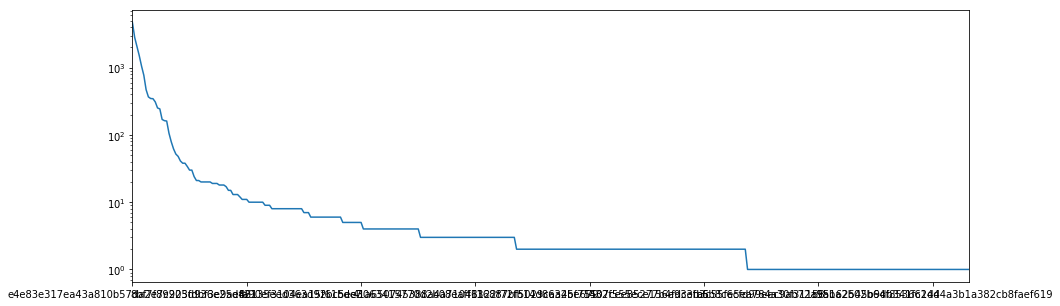

In [17]:
users[users.Data_uniqueid.notnull()].Data_uniqueid.value_counts().plot(figsize=(15,5), logy=True)
plt.show()

In [21]:
users.ActionName.value_counts()

READ-GRANTED          13056
WRITE-GRANTED          5379
DEVICE-ATTACHED        1005
READ-DENIED             495
WRITE-DENIED             92
KEYLOGGER-DETECTED       29
ADMIN-AUDIT              14
MEDIUM-INSERTED           4
Name: ActionName, dtype: int64

In [37]:
users[users.ActionName == 'MEDIUM-INSERTED']['Data_path'].value_counts()

Series([], Name: Data_path, dtype: int64)

дропаем?

In [17]:
users[users['UserSID'] == "S-1-5-21-3989785535-4168274036-2173320020-31967"].ActionName.value_counts()

READ-GRANTED     951
WRITE-GRANTED    106
Name: ActionName, dtype: int64

Допустим, пользователи - это Relative ID   
сделаем таблицу с пользователями и рассчитаем для каждого:
- устройства
  - число повторов
  - 
- 
  - dsadsa
  - dsadsa

sadas

In [31]:
users[['Data_uniqueid', 'Data_modelid']].groupby('Data_modelid').count().sort_values('Data_uniqueid')

,Data_uniqueid
Data_modelid,
ff327307aedc1d671e5b5ffec2b326cd0ff2c50e,0
172ffc38f954dcfe870ff0c627741ae693db44d7,0
6eae4958d180125e9184faf03ce8146a9f16f1c6,0
6d3d7605fe45aa0a965a641730937388faff76c0,0
308af73a85ddb5e192bdf6b30108658eb24965ac,0
5913c8045ad3c857412844d3269ca131dadd90dc,0
56cead33c6b2f676a8a947f35478484f8a7d3a3d,0
1dfba77f8c0ede23ef3ed01e217007ba69041742,0
1eb50fc4c735ce4d7dce4957965591c6dd7f9341,0


In [36]:
users[['Data_uniqueid', 'Data_modelid']].groupby('Data_uniqueid').count().sort_values('Data_modelid')

,Data_modelid
Data_uniqueid,
65fe505922278a60c3200cfa1ba93797f227e089,0
fe4977349002edeb485d42f52b1224af978aa43e,0
ffb61659f68b1e2f9a3dd6fbaa1fcbe5152ea8e5,1
967a51bd4ee7d9c6daeff008774fa266652d66f5,1
9ae9366060d7b2b1055979e6c7a57e891a2f5c05,1
9b002410cf6b7cfff7d428629edc433307fdc728,1
416f06bdc1661a3bdc2d1e111043e1a537c24e2f,1
3f73de66b309736c03177dc4f7b6d3986e146232,1
3d248c1898c35e3b9d2ac7cc46e248294d638fd5,1


In [160]:
a = users[['Data_devicename', 'Data_devicetype']].groupby(['Data_devicename'])['Data_devicetype'].apply(lambda x: set([str(_) for _ in x]))
a.values.tolist()
#users.groupby('Data_devicename')

[{'Removable'},
 {'CD'},
 {'USBPrinter'},
 {'WPD'},
 {'USBPrinter'},
 {'Removable'},
 {'Wireless'},
 {'USBPrinter'},
 {'USBPrinter'},
 {'USBPrinter'},
 {'Scanner'},
 {'NEM'},
 {'Scanner'},
 {'Removable'},
 {'Removable'},
 {'CD'},
 {'USBPrinter'},
 {'WPD'},
 {'WPD'},
 {'Removable'},
 {'USBPrinter'},
 {'NEM'},
 {'Removable'},
 {'Removable'},
 {'Removable'},
 {'Removable'},
 {'nan'},
 {'USBPrinter'},
 {'WPD'},
 {'Scanner'},
 {'USBPrinter'},
 {'USBPrinter'},
 {'COM', 'Unknown'},
 {'USBPrinter'},
 {'CD'},
 {'Floppy'},
 {'WPD'},
 {'nan'},
 {'USBPrinter'},
 {'WPD'},
 {'nan'},
 {'USBPrinter'},
 {'USBPrinter'},
 {'WPD'},
 {'CD'},
 {'Removable'},
 {'USBPrinter'},
 {'Removable'},
 {'USBPrinter'},
 {'CD'},
 {'Removable'},
 {'USBPrinter'},
 {'USBPrinter'},
 {'NEM'},
 {'Scanner'},
 {'CD'},
 {'CD'},
 {'USBPrinter'},
 {'CD'},
 {'Scanner'},
 {'Removable'},
 {'USBPrinter'},
 {'nan'},
 {'USBPrinter'},
 {'Scanner'},
 {'CD'},
 {'USBPrinter'},
 {'Scanner'},
 {'WPD'},
 {'Biometric'},
 {'SCReader'},
 {'NEM', 

In [161]:
users[(users.UserSID != 'S-1-5-18') & (users.ActionName == 'DEVICE-ATTACHED')]

,EntryID,Data_devicetype,Data_devicename,Data_label,Data_path,Data_processname,Data_other,Data_reason,Data_uniqueid,Data_modelid,...,ComputerName,ActionName,UserSID,NTUserName,ADUserName,ext,path,auth,domain,relative
361,423700361,USBPrinter,3e9cbb4e30efdf17ef6a5e0594d0b48e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_03f0&Pid_3817&Rev_0100&Mi_00,NaN,231670a5becda2074ff0fdf522164a74db5622f5,f3b8751675de765905cb8d675ecdddeb4884b86e,...,e64c9391565b6f595cb9a2d67ba3407a.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-18717,e787e268e4f558b4616ef4bce5998bdb,bcf144eb2a2cdbca01dde215aef15d5a,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,18717
362,423700362,USBPrinter,e9a7554599d34fc4bffedab5e82d9a22,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USBPRINT\Hewlett-PackardHP_LaF552,NaN,231670a5becda2074ff0fdf522164a74db5622f5,867d896d92635183bb7915fbdf5e7f478ffd7bf3,...,e64c9391565b6f595cb9a2d67ba3407a.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-18717,e787e268e4f558b4616ef4bce5998bdb,bcf144eb2a2cdbca01dde215aef15d5a,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,18717
400,423700400,Scanner,94d848099b951d61244a8e356da2a26d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_04c5&Pid_132e&Rev_0100,NaN,0000000000000000000000000000000000000000,4e8e1e66b6f01c8b7ca00774e4c09ab6e074abfc,...,45e7821898b3d76f5056633b55ecc3f2.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-85118,2c826076c39676793ef9b24c1039ae8d,3b84e8b044be59ffea049850fb83d408,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,85118
401,423700401,Scanner,94d848099b951d61244a8e356da2a26d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_04c5&Pid_132e&Rev_0100,NaN,0000000000000000000000000000000000000000,4e8e1e66b6f01c8b7ca00774e4c09ab6e074abfc,...,45e7821898b3d76f5056633b55ecc3f2.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-85118,2c826076c39676793ef9b24c1039ae8d,3b84e8b044be59ffea049850fb83d408,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,85118
411,423700411,SCReader,775b92bff1b8f000170b011cbb8ff83d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_0529&Pid_0620&Rev_0100,NaN,ce2bf56ff5a3e021ae4c8dd070a2f2fe0a8c4016,ec383f7136b2c30db78a8da12cf3d5b71beaddda,...,f0c464f0ce83bdda5c8ce390b57467aa.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-52125,6caa9e76152293a9745b69014a4bd8dc,8896f42256b1f98f207bee95266f5156,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,52125
680,423700680,Scanner,c8fcb337a54832647ef1e21fe17fcb52,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_04e8&Pid_6860&Rev_0400,NaN,8bf7f89923fdbf3e9aefa90ef3104ea15f61bdc7,c0901f4e1175adefab86c6d1696ba676c855d2ad,...,9c24bd7a0e112e1ebaaf708849aa2b89.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-43224,f52a83d9faee64e409af9fce336f96be,473a91bb7ec8522bbf9858f875e14905,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,43224
692,423700692,SCReader,775b92bff1b8f000170b011cbb8ff83d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_0529&Pid_0620&Rev_0100,NaN,0000000000000000000000000000000000000000,ec383f7136b2c30db78a8da12cf3d5b71beaddda,...,488c30f6ac7cc01f87eebc6c4a623004.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-7609,17021b4e9ef930c1d38c3bec135d3e2c,bbf61c68b00c436d1b6b298c346322ab,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,7609
694,423700694,WPD,4a4669074bd2a85f2ebb679710a8c34a,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_05ac&Pid_12a8&Rev_0510,NaN,65054e313b6cc0a13e1755b4fea3d4ddc0ff5ad4,9f5b160733bc06cd22206cd7942762fdf9d323cc,...,be0d9d8a2d9fa58306cf8057bd12c50d.fa7153f7ed1cb...,DEVICE-ATTACHED,S-1-5-21-3989785535-4168274036-2173320020-77226,10be3f1c25f1b16d4b6abe36bacf27a3,7706aae3faac2d24e9ee7d26eb1f712b,NaN,NaN,S-1-5-21,3989785535-4168274036-2173320020,77226
705,423700705,Scanner,94d848099b951d61244a8e356da2a26d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USB\Vid_04c5&Pid_132e&Rev_0100,NaN,00000000000000000

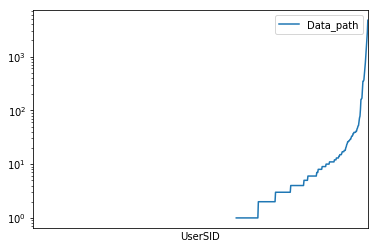

In [7]:
users[['UserSID','Data_path']].groupby('UserSID').count().sort_values('Data_path').plot(logy=True)
plt.xticks([])
plt.show()

In [12]:
sids[70:80]

['S-1-5-21-3989785535-4168274036-2173320020-87885',
 'S-1-5-21-3989785535-4168274036-2173320020-8201',
 'S-1-5-21-3989785535-4168274036-2173320020-6525',
 'S-1-5-21-3989785535-4168274036-2173320020-25108',
 'S-1-5-21-3989785535-4168274036-2173320020-86721',
 'S-1-5-21-3989785535-4168274036-2173320020-33279',
 'S-1-5-21-3989785535-4168274036-2173320020-73377',
 'S-1-5-21-2628969400-438586680-1697588153-1010',
 'S-1-5-21-3989785535-4168274036-2173320020-82059',
 'S-1-5-21-3989785535-4168274036-2173320020-29042']

In [ ]:
u = users[users.UserSID == 'S-1-5-21-3989785535-4168274036-2173320020-87885']
#56277
#S-1-5-21-3989785535-4168274036-2173320020-86715

# foreach in ActionName ofc

# ! define scale for -DENIED more than for others

u[u['READ-GRANTED'] == 1].groupby('Data_path').count().groupby('EntryID').count()['READ-GRANTED']
#u.groupby('Data_devicename').count()
#u.groupby('Data_devicetype').count()

ut = u.set_index(pd.DatetimeIndex(u.LocalDateTime))
display(ut)
# finging median, mean, min, max for size per minute
us = ut.groupby(pd.TimeGrouper(freq='60s')).sum().Data_filesize.sort_values().dropna().sort_index()
display(us)
minimal = us.values[0]
maximal = us.values[-1]
mean = us.mean()
median = us.values[len(us)//2]

# get number of accesses per minute 
l = sorted(ut.index.tolist())
# note: drop zeroes from next list and take mean and max
# min and median makes no sence as it's almost always 1
l = [abs((i - j)/np.timedelta64(1, 's')) for i, j in zip(l[:-1], l[1:]) if abs((i - j)/np.timedelta64(1, 's')) != 0]
access_mean = np.mean(l)
access_max = np.max(l)

#count extensions
exts = u.ext.value_counts().count()

# count devices
devs = u.Data_devicename.value_counts().count()



,EntryID,Data_devicetype,Data_devicename,Data_label,Data_path,Data_processname,Data_other,Data_reason,Data_uniqueid,Data_modelid,...,domain,relative,ADMIN-AUDIT,DEVICE-ATTACHED,KEYLOGGER-DETECTED,MEDIUM-INSERTED,READ-DENIED,READ-GRANTED,WRITE-DENIED,WRITE-GRANTED
LocalDateTime,,,,,,,,,,,,,,,,,,,,,
1753-01-01 00:00:00,423707178,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
1753-01-01 00:00:00,423707687,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
1753-01-01 00:00:00,423708010,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,Unencrypted/Non-HDD/USB: Read/Write (High prio...,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
2017-01-17 10:23:59,423709438,Removable,d2f7c1a42c4226107caf3ca5e4fddf2d,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,USBSTOR\DiskJetFlashTranscend_8GB___1100,NaN,d6cb339889f1100607ec88e68f0f3cb97143572b,a467769efe62cf6e8236915e0d4f0300d1272ecd,...,3989785535-4168274036-2173320020,87885,0,1,0,0,0,0,0,0
2017-01-17 10:24:05,423709439,WPD,d921e8ff6b13f36cf58110194f46597b,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,0000000000000000000000000000000000000000,0000000000000000000000000000000000000000,...,3989785535-4168274036-2173320020,87885,0,1,0,0,0,0,0,0
1753-01-01 00:00:00,423712734,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
1753-01-01 00:00:00,423712791,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
1753-01-01 00:00:00,423714549,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,Unencrypted/Non-HDD/USB: Read/Write (High prio...,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0
1753-01-01 00:00:00,423719515,NaN,d41d8cd98f00b204e9800998ecf8427e,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,NaN,NaN,NaN,...,3989785535-4168274036-2173320020,87885,1,0,0,0,0,0,0,0


In [6]:
users[users.ActionName == 'READ-GRANTED'][['LocalDateTime', 'TransferredDate']]

,LocalDateTime,TransferredDate
0,2017-01-17 09:46:43,2017-01-17 06:58:09
13,2017-01-17 09:46:50,2017-01-17 06:58:09
28,2017-01-17 09:46:26,2017-01-17 06:58:09
61,2017-01-17 09:43:57,2017-01-17 06:58:09
63,2017-01-17 09:44:05,2017-01-17 06:58:09
72,2017-01-17 09:46:50,2017-01-17 06:58:09
105,2017-01-17 09:46:26,2017-01-17 06:58:10
124,2017-01-17 09:43:57,2017-01-17 06:58:10
126,2017-01-17 09:44:05,2017-01-17 06:58:10
132,2017-01-17 09:46:43,2017-01-17 06:58:10


In [9]:
from itertools import chain
from datetime import date
# surely divide action fields by four
actions = users.ActionName.value_counts().index.tolist()
actions.remove('ADMIN-AUDIT')
# filesize
cols = list(chain.from_iterable((i+'-size-min', i+'-size-max', i+'-size-mean', i+'-size-med') for i in actions))
# files
cols += list(chain.from_iterable((i+'-path-min', i+'-path-max', i+'-path-mean', i+'-path-med') for i in actions))
cols += ['ACCESS-mean', 'ACCESS-max', 'exts', 'devs']
# ! add files counter
sids = users['UserSID'].value_counts().index.tolist()
df = pd.DataFrame(index=sids, columns=cols)


scales = dict.fromkeys(cols, 0)

for sid in sids:
    display(sid)
    u = users[users.UserSID == sid]
    u = u.drop(u[u['LocalDateTime'] < '2016-01-01'].index)
    if len(u) == 0:
        continue
    d = dict.fromkeys(cols)
    d['exts'] = u.ext.value_counts().count()
    d['devs'] = u.Data_devicename.value_counts().count()
    
    # get number of accesses per minute 
    #display(u)
    ut = u.set_index(pd.DatetimeIndex(u.LocalDateTime))
    us = ut.groupby(pd.TimeGrouper(freq='60s')).count().Data_path.sort_values().dropna()
    l = sorted(ut.index.tolist())
    
    # note: drop zeroes from next list and take mean and max
    # min and median makes no sence as it's almost always 1
    if len(l) == 1:
        l = 0.000001
    else:
        l = [abs(int((i - j)/np.timedelta64(1, 's'))+0.000001) for i, j in zip(l[:-1], l[1:])]# if abs((i - j)/np.timedelta64(1, 's')) != 0]
    d['ACCESS-mean'] = np.mean(l)
    d['ACCESS-max'] = np.max(l)
    

    for act in actions:
        # finging median, mean, min, max for size per minute
        uact = u[u[act] == 1]
        uact = uact.set_index(pd.DatetimeIndex(uact.LocalDateTime))
        # data_filesize defined only for access-granted files
        uact = uact.groupby(pd.TimeGrouper(freq='60s')).sum().Data_filesize.sort_values().dropna()
        if uact.values.size != 0:
            d[act+'-size-min'] = uact.values[0]
            d[act+'-size-max'] = uact.values[-1]
            d[act+'-size-mean'] = uact.mean()
            d[act+'-size-med'] = uact.values[len(uact)//2]
        else:
            d[act+'-size-min'] = 0
            d[act+'-size-max'] = 0
            d[act+'-size-mean'] = 0
            d[act+'-size-med'] = 0
            
        uact = u[u[act] == 1]
        uact = uact.set_index(pd.DatetimeIndex(uact.LocalDateTime))
        uact = uact.groupby(pd.TimeGrouper(freq='60s')).count().Data_path.sort_values().dropna()
        if uact.values.size != 0:
            d[act+'-path-min'] = uact.values[0]
            d[act+'-path-max'] = uact.values[-1]
            d[act+'-path-mean'] = uact.mean()
            d[act+'-path-med'] = uact.values[len(uact)//2]
        else:
            d[act+'-path-min'] = 0
            d[act+'-path-max'] = 0
            d[act+'-path-mean'] = 0
            d[act+'-path-med'] = 0        
    scales = {k:d[k] if d[k] > scales[k] else scales[k] for k in scales.keys()}
#     if sid == 'S-1-5-21-1183061375-2181464864-3048346609-1043':
#         display(d)
    df.loc[sid] = d


'S-1-5-21-3989785535-4168274036-2173320020-73776'

'S-1-5-21-3989785535-4168274036-2173320020-4415'

'S-1-5-21-3989785535-4168274036-2173320020-86715'

'S-1-5-21-3989785535-4168274036-2173320020-15220'

'S-1-5-21-3989785535-4168274036-2173320020-31967'

'S-1-5-21-3989785535-4168274036-2173320020-10740'

'S-1-5-21-3989785535-4168274036-2173320020-29115'

'S-1-5-21-3989785535-4168274036-2173320020-86330'

'S-1-5-21-3989785535-4168274036-2173320020-1156'

'S-1-5-21-3989785535-4168274036-2173320020-10160'

'S-1-5-21-3989785535-4168274036-2173320020-31861'

'S-1-5-21-3989785535-4168274036-2173320020-10163'

'S-1-5-21-3989785535-4168274036-2173320020-13676'

'S-1-5-21-3989785535-4168274036-2173320020-59450'

'S-1-5-21-3989785535-4168274036-2173320020-15291'

'S-1-5-21-3989785535-4168274036-2173320020-34142'

'S-1-5-21-3989785535-4168274036-2173320020-34349'

'S-1-5-21-3989785535-4168274036-2173320020-56277'

'S-1-5-21-3989785535-4168274036-2173320020-49348'

'S-1-5-21-3989785535-4168274036-2173320020-26738'

'S-1-5-21-3989785535-4168274036-2173320020-58132'

'S-1-5-21-3989785535-4168274036-2173320020-42804'

'S-1-5-21-1183061375-2181464864-3048346609-1043'

'S-1-5-21-3989785535-4168274036-2173320020-72124'

'S-1-5-21-3989785535-4168274036-2173320020-6314'

'S-1-5-21-3989785535-4168274036-2173320020-77317'

'S-1-5-21-3989785535-4168274036-2173320020-29719'

'S-1-5-21-3989785535-4168274036-2173320020-40892'

'S-1-5-21-3989785535-4168274036-2173320020-4422'

'S-1-5-21-3989785535-4168274036-2173320020-86812'

'S-1-5-21-3989785535-4168274036-2173320020-26639'

'S-1-5-21-3989785535-4168274036-2173320020-52397'

'S-1-5-21-3989785535-4168274036-2173320020-21930'

'S-1-5-21-3709697480-2374202753-692791365-1010'

'S-1-5-21-4112252962-2410545228-4178100140-1014'

'S-1-5-21-3989785535-4168274036-2173320020-18340'

'S-1-5-21-3989785535-4168274036-2173320020-34350'

'S-1-5-21-3989785535-4168274036-2173320020-26632'

'S-1-5-21-3989785535-4168274036-2173320020-70169'

'S-1-5-21-3989785535-4168274036-2173320020-37108'

'S-1-5-21-2628969400-438586680-1697588153-500'

'S-1-5-21-3989785535-4168274036-2173320020-80438'

'S-1-5-21-3989785535-4168274036-2173320020-15069'

'S-1-5-21-3989785535-4168274036-2173320020-86787'

'S-1-5-21-3989785535-4168274036-2173320020-2739'

'S-1-5-21-3989785535-4168274036-2173320020-80483'

'S-1-5-21-3989785535-4168274036-2173320020-41295'

'S-1-5-21-3989785535-4168274036-2173320020-86525'

'S-1-5-21-3989785535-4168274036-2173320020-41009'

'S-1-5-21-3989785535-4168274036-2173320020-4208'

'S-1-5-21-3989785535-4168274036-2173320020-11063'

'S-1-5-21-3989785535-4168274036-2173320020-40661'

'S-1-5-21-3989785535-4168274036-2173320020-3003'

'S-1-5-21-3989785535-4168274036-2173320020-40804'

'S-1-5-21-3989785535-4168274036-2173320020-3236'

'S-1-5-21-3989785535-4168274036-2173320020-14968'

'S-1-5-21-3989785535-4168274036-2173320020-10835'

'S-1-5-21-3989785535-4168274036-2173320020-24809'

'S-1-5-21-3989785535-4168274036-2173320020-14647'

'S-1-5-21-3989785535-4168274036-2173320020-85118'

'S-1-5-21-3989785535-4168274036-2173320020-56357'

'S-1-5-21-3989785535-4168274036-2173320020-33237'

'S-1-5-21-3989785535-4168274036-2173320020-70376'

'S-1-5-21-3989785535-4168274036-2173320020-4201'

'S-1-5-21-3989785535-4168274036-2173320020-83887'

'S-1-5-21-3989785535-4168274036-2173320020-40956'

'S-1-5-21-3989785535-4168274036-2173320020-41452'

'S-1-5-21-3989785535-4168274036-2173320020-48763'

'S-1-5-21-3989785535-4168274036-2173320020-8201'

'S-1-5-21-3989785535-4168274036-2173320020-86721'

'S-1-5-21-3989785535-4168274036-2173320020-25108'

'S-1-5-21-3989785535-4168274036-2173320020-6525'

'S-1-5-21-3989785535-4168274036-2173320020-87885'

'S-1-5-21-3989785535-4168274036-2173320020-82059'

'S-1-5-21-3989785535-4168274036-2173320020-73377'

'S-1-5-21-3989785535-4168274036-2173320020-29042'

'S-1-5-21-3989785535-4168274036-2173320020-33279'

'S-1-5-21-2628969400-438586680-1697588153-1010'

'S-1-5-21-3989785535-4168274036-2173320020-80448'

'S-1-5-21-3989785535-4168274036-2173320020-81531'

'S-1-5-21-3989785535-4168274036-2173320020-13144'

'S-1-5-21-3989785535-4168274036-2173320020-26330'

'S-1-5-21-3989785535-4168274036-2173320020-17437'

'S-1-5-21-3989785535-4168274036-2173320020-73319'

'S-1-5-21-3989785535-4168274036-2173320020-4475'

'S-1-5-21-3989785535-4168274036-2173320020-86720'

'S-1-5-21-3989785535-4168274036-2173320020-37410'

'S-1-5-21-3989785535-4168274036-2173320020-41043'

'S-1-5-21-3989785535-4168274036-2173320020-86331'

'S-1-5-21-3989785535-4168274036-2173320020-73375'

'S-1-5-21-3989785535-4168274036-2173320020-21950'

'S-1-5-21-2450068477-2472386402-286360231-1009'

'S-1-5-21-3989785535-4168274036-2173320020-7278'

'S-1-5-21-3989785535-4168274036-2173320020-17183'

'S-1-5-21-3989785535-4168274036-2173320020-53560'

'S-1-5-21-3989785535-4168274036-2173320020-13145'

'S-1-5-21-3989785535-4168274036-2173320020-10892'

'S-1-5-21-1183061375-2181464864-3048346609-1012'

'S-1-5-21-3989785535-4168274036-2173320020-43224'

'S-1-5-21-3989785535-4168274036-2173320020-52499'

'S-1-5-21-3989785535-4168274036-2173320020-4414'

'S-1-5-21-3989785535-4168274036-2173320020-31697'

'S-1-5-21-3989785535-4168274036-2173320020-13958'

'S-1-5-21-3989785535-4168274036-2173320020-29387'

'S-1-5-21-3989785535-4168274036-2173320020-27060'

'S-1-5-21-3989785535-4168274036-2173320020-2719'

'S-1-5-21-3989785535-4168274036-2173320020-34497'

'S-1-5-21-3989785535-4168274036-2173320020-52358'

'S-1-5-21-3989785535-4168274036-2173320020-49030'

'S-1-5-21-3989785535-4168274036-2173320020-56582'

'S-1-5-21-3989785535-4168274036-2173320020-8860'

'S-1-5-21-3989785535-4168274036-2173320020-82071'

'S-1-5-21-3266432701-2158446112-3111658435-500'

'S-1-5-21-3989785535-4168274036-2173320020-72451'

'S-1-5-21-3989785535-4168274036-2173320020-4224'

'S-1-5-21-3989785535-4168274036-2173320020-21443'

'S-1-5-21-3989785535-4168274036-2173320020-52210'

'S-1-5-21-1838804667-3725340864-688458081-1172'

'S-1-5-21-3989785535-4168274036-2173320020-54167'

'S-1-5-21-3989785535-4168274036-2173320020-29485'

'S-1-5-21-3989785535-4168274036-2173320020-70170'

'S-1-5-21-3989785535-4168274036-2173320020-14189'

'S-1-5-21-3989785535-4168274036-2173320020-53161'

'S-1-5-21-1560110875-1760500963-316617838-1003'

'S-1-5-21-1838804667-3725340864-688458081-2266'

'S-1-5-21-3989785535-4168274036-2173320020-18729'

'S-1-5-21-3989785535-4168274036-2173320020-10264'

'S-1-5-21-3989785535-4168274036-2173320020-14364'

'S-1-5-21-3989785535-4168274036-2173320020-40647'

'S-1-5-21-3989785535-4168274036-2173320020-86332'

'S-1-5-21-3989785535-4168274036-2173320020-52584'

'S-1-5-21-3989785535-4168274036-2173320020-18717'

'S-1-5-21-3989785535-4168274036-2173320020-31901'

'S-1-5-21-3989785535-4168274036-2173320020-4227'

'S-1-5-21-3989785535-4168274036-2173320020-81466'

'S-1-5-21-3989785535-4168274036-2173320020-86544'

'S-1-5-21-3989785535-4168274036-2173320020-15344'

'S-1-5-21-3989785535-4168274036-2173320020-29939'

'S-1-5-21-3989785535-4168274036-2173320020-13359'

'S-1-5-21-3989785535-4168274036-2173320020-8827'

'S-1-5-21-3989785535-4168274036-2173320020-8594'

'S-1-5-21-3989785535-4168274036-2173320020-41353'

'S-1-5-21-1838804667-3725340864-688458081-1843'

'S-1-5-21-3989785535-4168274036-2173320020-13588'

'S-1-5-21-3989785535-4168274036-2173320020-41123'

'S-1-5-21-3989785535-4168274036-2173320020-10723'

'S-1-5-21-3989785535-4168274036-2173320020-81762'

'S-1-5-21-3989785535-4168274036-2173320020-17443'

'S-1-5-21-3989785535-4168274036-2173320020-59136'

'S-1-5-21-1838804667-3725340864-688458081-1351'

'S-1-5-21-3989785535-4168274036-2173320020-47101'

'S-1-5-21-3989785535-4168274036-2173320020-26481'

'S-1-5-21-3989785535-4168274036-2173320020-73746'

'S-1-5-21-3989785535-4168274036-2173320020-86337'

'S-1-5-21-3989785535-4168274036-2173320020-43512'

'S-1-5-21-3989785535-4168274036-2173320020-81922'

'S-1-5-21-3989785535-4168274036-2173320020-21439'

'S-1-5-21-3989785535-4168274036-2173320020-52128'

'S-1-5-21-3989785535-4168274036-2173320020-8510'

'S-1-5-21-3989785535-4168274036-2173320020-34315'

'S-1-5-21-3989785535-4168274036-2173320020-1916'

'S-1-5-21-3989785535-4168274036-2173320020-16630'

'S-1-5-21-3989785535-4168274036-2173320020-48952'

'S-1-5-21-3989785535-4168274036-2173320020-22618'

'S-1-5-21-3989785535-4168274036-2173320020-13668'

'S-1-5-21-3989785535-4168274036-2173320020-73512'

'S-1-5-21-3989785535-4168274036-2173320020-86524'

'S-1-5-21-3989785535-4168274036-2173320020-2923'

'S-1-5-21-3989785535-4168274036-2173320020-56595'

'S-1-5-21-1838804667-3725340864-688458081-2146'

'S-1-5-21-3989785535-4168274036-2173320020-53331'

'S-1-5-21-3989785535-4168274036-2173320020-41036'

'S-1-5-21-3989785535-4168274036-2173320020-23064'

'S-1-5-21-3989785535-4168274036-2173320020-81660'

'S-1-5-21-3989785535-4168274036-2173320020-82094'

'S-1-5-21-3989785535-4168274036-2173320020-78122'

'S-1-5-21-3989785535-4168274036-2173320020-80221'

'S-1-5-21-3989785535-4168274036-2173320020-56393'

'S-1-5-21-1183061375-2181464864-3048346609-1028'

'S-1-5-21-3989785535-4168274036-2173320020-70226'

'S-1-5-21-3989785535-4168274036-2173320020-86467'

'S-1-5-21-3989785535-4168274036-2173320020-53599'

'S-1-5-21-3989785535-4168274036-2173320020-56276'

'S-1-5-21-3989785535-4168274036-2173320020-13826'

'S-1-5-21-3989785535-4168274036-2173320020-7171'

'S-1-5-21-3989785535-4168274036-2173320020-88046'

'S-1-5-21-3989785535-4168274036-2173320020-17311'

'S-1-5-21-789336058-1659004503-839522115-1017'

'S-1-5-21-3989785535-4168274036-2173320020-31932'

'S-1-5-21-3989785535-4168274036-2173320020-86319'

'S-1-5-21-3989785535-4168274036-2173320020-14372'

'S-1-5-21-789336058-1659004503-839522115-1018'

'S-1-5-21-3989785535-4168274036-2173320020-4179'

'S-1-5-21-3989785535-4168274036-2173320020-34516'

'S-1-5-21-3989785535-4168274036-2173320020-70466'

'S-1-5-21-3989785535-4168274036-2173320020-34600'

'S-1-5-21-3989785535-4168274036-2173320020-47166'

'S-1-5-21-3989785535-4168274036-2173320020-30604'

'S-1-5-21-3989785535-4168274036-2173320020-27713'

'S-1-5-21-3989785535-4168274036-2173320020-88047'

'S-1-5-21-3989785535-4168274036-2173320020-9052'

'S-1-5-21-3989785535-4168274036-2173320020-40994'

'S-1-5-21-3989785535-4168274036-2173320020-7186'

'S-1-5-21-3989785535-4168274036-2173320020-4606'

'S-1-5-21-3989785535-4168274036-2173320020-10327'

'S-1-5-21-3989785535-4168274036-2173320020-70229'

'S-1-5-21-3989785535-4168274036-2173320020-79438'

'S-1-5-21-3989785535-4168274036-2173320020-83972'

'S-1-5-21-3989785535-4168274036-2173320020-77114'

'S-1-5-21-3989785535-4168274036-2173320020-25530'

'S-1-5-21-3989785535-4168274036-2173320020-41255'

'S-1-5-21-3989785535-4168274036-2173320020-84094'

'S-1-5-21-3989785535-4168274036-2173320020-53207'

'S-1-5-21-3989785535-4168274036-2173320020-31678'

'S-1-5-21-3989785535-4168274036-2173320020-17303'

'S-1-5-21-3989785535-4168274036-2173320020-29133'

'S-1-5-21-3989785535-4168274036-2173320020-88054'

'S-1-5-21-3989785535-4168274036-2173320020-77443'

'S-1-5-21-3989785535-4168274036-2173320020-56806'

'S-1-5-21-3989785535-4168274036-2173320020-77264'

'S-1-5-21-3989785535-4168274036-2173320020-7132'

'S-1-5-21-3989785535-4168274036-2173320020-83338'

'S-1-5-21-3989785535-4168274036-2173320020-48846'

'S-1-5-21-3989785535-4168274036-2173320020-83186'

'S-1-5-21-3989785535-4168274036-2173320020-44399'

'S-1-5-21-3989785535-4168274036-2173320020-29109'

'S-1-5-21-3989785535-4168274036-2173320020-14567'

'S-1-5-21-3989785535-4168274036-2173320020-18241'

'S-1-5-21-3989785535-4168274036-2173320020-56258'

'S-1-5-21-3989785535-4168274036-2173320020-7265'

'S-1-5-21-3989785535-4168274036-2173320020-83332'

'S-1-5-21-3989785535-4168274036-2173320020-83521'

'S-1-5-21-3989785535-4168274036-2173320020-42842'

'S-1-5-21-3989785535-4168274036-2173320020-87047'

'S-1-5-21-3989785535-4168274036-2173320020-86113'

'S-1-5-21-3989785535-4168274036-2173320020-24991'

'S-1-5-21-3989785535-4168274036-2173320020-42949'

'S-1-5-21-3989785535-4168274036-2173320020-11876'

'S-1-5-21-3989785535-4168274036-2173320020-2523'

'S-1-5-21-3989785535-4168274036-2173320020-21266'

'S-1-5-21-3989785535-4168274036-2173320020-85587'

'S-1-5-21-3989785535-4168274036-2173320020-59108'

'S-1-5-21-3989785535-4168274036-2173320020-86529'

'S-1-5-21-3989785535-4168274036-2173320020-29173'

'S-1-5-21-3989785535-4168274036-2173320020-38355'

'S-1-5-21-3989785535-4168274036-2173320020-44108'

'S-1-5-21-3989785535-4168274036-2173320020-70474'

'S-1-5-21-3989785535-4168274036-2173320020-58207'

'S-1-5-21-3989785535-4168274036-2173320020-27715'

'S-1-5-21-3989785535-4168274036-2173320020-83727'

'S-1-5-21-3989785535-4168274036-2173320020-86781'

'S-1-5-21-3989785535-4168274036-2173320020-27801'

'S-1-5-21-3989785535-4168274036-2173320020-34209'

'S-1-5-21-3989785535-4168274036-2173320020-29428'

'S-1-5-21-3989785535-4168274036-2173320020-23224'

'S-1-5-21-3989785535-4168274036-2173320020-42864'

'S-1-5-21-3989785535-4168274036-2173320020-18404'

'S-1-5-21-3989785535-4168274036-2173320020-21608'

'S-1-5-21-3989785535-4168274036-2173320020-33492'

'S-1-5-21-3989785535-4168274036-2173320020-81150'

'S-1-5-21-3989785535-4168274036-2173320020-84022'

'S-1-5-21-3989785535-4168274036-2173320020-17421'

'S-1-5-21-3989785535-4168274036-2173320020-48862'

'S-1-5-21-3989785535-4168274036-2173320020-8746'

'S-1-5-21-3989785535-4168274036-2173320020-10884'

'S-1-5-21-3989785535-4168274036-2173320020-81459'

'S-1-5-21-672618454-2870002576-310546975-1001'

'S-1-5-21-3989785535-4168274036-2173320020-29646'

'S-1-5-21-3989785535-4168274036-2173320020-30611'

'S-1-5-21-3989785535-4168274036-2173320020-15180'

'S-1-5-21-3989785535-4168274036-2173320020-34526'

'S-1-5-21-3989785535-4168274036-2173320020-81493'

'S-1-5-21-3989785535-4168274036-2173320020-41002'

'S-1-5-21-3989785535-4168274036-2173320020-25916'

'S-1-5-21-3989785535-4168274036-2173320020-83441'

'S-1-5-21-3989785535-4168274036-2173320020-84012'

'S-1-5-21-3989785535-4168274036-2173320020-75218'

'S-1-5-21-3989785535-4168274036-2173320020-47499'

'S-1-5-21-3989785535-4168274036-2173320020-80526'

'S-1-5-21-3989785535-4168274036-2173320020-75328'

'S-1-5-21-3989785535-4168274036-2173320020-17438'

'S-1-5-21-3989785535-4168274036-2173320020-28084'

'S-1-5-21-3989785535-4168274036-2173320020-72321'

'S-1-5-21-3989785535-4168274036-2173320020-70141'

'S-1-5-21-3989785535-4168274036-2173320020-47392'

'S-1-5-21-3989785535-4168274036-2173320020-21129'

'S-1-5-21-1427124961-3468675290-2974867751-1032'

'S-1-5-21-3989785535-4168274036-2173320020-46829'

'S-1-5-21-3989785535-4168274036-2173320020-29396'

'S-1-5-21-3989785535-4168274036-2173320020-10648'

'S-1-5-21-3989785535-4168274036-2173320020-56394'

'S-1-5-21-3989785535-4168274036-2173320020-10681'

'S-1-5-21-3989785535-4168274036-2173320020-6214'

'S-1-5-21-3989785535-4168274036-2173320020-7498'

'S-1-5-21-3989785535-4168274036-2173320020-80224'

'S-1-5-21-3989785535-4168274036-2173320020-6216'

'S-1-5-21-3485277825-1210183076-2498467224-1010'

'S-1-5-21-3989785535-4168274036-2173320020-2354'

'S-1-5-21-3989785535-4168274036-2173320020-80555'

'S-1-5-21-3989785535-4168274036-2173320020-87776'

'S-1-5-21-3989785535-4168274036-2173320020-10421'

'S-1-5-21-3989785535-4168274036-2173320020-4610'

'S-1-5-21-3139142704-4111420348-4136106932-1001'

'S-1-5-21-3989785535-4168274036-2173320020-79415'

'S-1-5-21-3989785535-4168274036-2173320020-26780'

'S-1-5-21-3989785535-4168274036-2173320020-80371'

'S-1-5-21-3989785535-4168274036-2173320020-3190'

'S-1-5-21-3989785535-4168274036-2173320020-17304'

'S-1-5-21-3989785535-4168274036-2173320020-15586'

'S-1-5-21-3989785535-4168274036-2173320020-49264'

'S-1-5-21-3989785535-4168274036-2173320020-41448'

'S-1-5-21-3989785535-4168274036-2173320020-28091'

'S-1-5-21-3989785535-4168274036-2173320020-81999'

'S-1-5-21-3989785535-4168274036-2173320020-33136'

'S-1-5-21-3989785535-4168274036-2173320020-88061'

'S-1-5-21-1297659990-2694759256-1037857003-500'

'S-1-5-21-3989785535-4168274036-2173320020-22793'

'S-1-5-21-3989785535-4168274036-2173320020-29855'

'S-1-5-21-1043958504-2282319452-132383582-1011'

'S-1-5-21-3989785535-4168274036-2173320020-59423'

'S-1-5-21-3989785535-4168274036-2173320020-22813'

'S-1-5-21-3989785535-4168274036-2173320020-80199'

'S-1-5-21-3989785535-4168274036-2173320020-4337'

'S-1-5-21-3989785535-4168274036-2173320020-73224'

'S-1-5-21-3989785535-4168274036-2173320020-72240'

'S-1-5-21-3989785535-4168274036-2173320020-43301'

'S-1-5-21-3989785535-4168274036-2173320020-43523'

'S-1-5-21-3989785535-4168274036-2173320020-10309'

'S-1-5-21-3989785535-4168274036-2173320020-17736'

'S-1-5-21-3989785535-4168274036-2173320020-43590'

'S-1-5-21-3989785535-4168274036-2173320020-19091'

'S-1-5-21-3989785535-4168274036-2173320020-87092'

'S-1-5-21-3989785535-4168274036-2173320020-83157'

'S-1-5-21-3989785535-4168274036-2173320020-30180'

'S-1-5-21-3989785535-4168274036-2173320020-83103'

'S-1-5-21-3989785535-4168274036-2173320020-30178'

'S-1-5-21-3989785535-4168274036-2173320020-85407'

'S-1-5-21-3989785535-4168274036-2173320020-28159'

'S-1-5-21-3989785535-4168274036-2173320020-77410'

'S-1-5-21-3989785535-4168274036-2173320020-34584'

'S-1-5-21-3989785535-4168274036-2173320020-15413'

'S-1-5-21-3989785535-4168274036-2173320020-87774'

'S-1-5-21-3989785535-4168274036-2173320020-33129'

'S-1-5-21-3989785535-4168274036-2173320020-29452'

'S-1-5-21-3989785535-4168274036-2173320020-59431'

'S-1-5-21-3989785535-4168274036-2173320020-86216'

'S-1-5-21-3989785535-4168274036-2173320020-11893'

'S-1-5-21-3989785535-4168274036-2173320020-26461'

'S-1-5-21-3989785535-4168274036-2173320020-86528'

'S-1-5-21-3989785535-4168274036-2173320020-37196'

'S-1-5-21-3989785535-4168274036-2173320020-44423'

'S-1-5-21-3989785535-4168274036-2173320020-14582'

'S-1-5-21-3989785535-4168274036-2173320020-80188'

'S-1-5-21-3989785535-4168274036-2173320020-2049'

'S-1-5-21-3989785535-4168274036-2173320020-77244'

'S-1-5-21-3989785535-4168274036-2173320020-4469'

'S-1-5-21-3989785535-4168274036-2173320020-53332'

'S-1-5-21-3989785535-4168274036-2173320020-83518'

'S-1-5-21-3989785535-4168274036-2173320020-34536'

'S-1-5-21-3989785535-4168274036-2173320020-11862'

'S-1-5-21-3989785535-4168274036-2173320020-26730'

'S-1-5-21-3989785535-4168274036-2173320020-41164'

'S-1-5-21-3989785535-4168274036-2173320020-13366'

'S-1-5-21-3989785535-4168274036-2173320020-2548'

'S-1-5-21-3989785535-4168274036-2173320020-38559'

'S-1-5-21-3989785535-4168274036-2173320020-1564'

'S-1-5-21-3989785535-4168274036-2173320020-11000'

'S-1-5-21-3989785535-4168274036-2173320020-81194'

'S-1-5-21-3989785535-4168274036-2173320020-27778'

'S-1-5-21-3989785535-4168274036-2173320020-53458'

'S-1-5-21-3989785535-4168274036-2173320020-7304'

'S-1-5-21-3989785535-4168274036-2173320020-8964'

'S-1-5-21-3989785535-4168274036-2173320020-6288'

'S-1-5-21-691274106-3812962617-1876845869-1016'

'S-1-5-21-3989785535-4168274036-2173320020-34318'

'S-1-5-21-3989785535-4168274036-2173320020-86392'

'S-1-5-21-3989785535-4168274036-2173320020-15057'

'S-1-5-21-3989785535-4168274036-2173320020-25751'

'S-1-5-21-3989785535-4168274036-2173320020-34265'

'S-1-5-21-3989785535-4168274036-2173320020-59201'

'S-1-5-21-3989785535-4168274036-2173320020-23437'

'S-1-5-21-3989785535-4168274036-2173320020-7205'

'S-1-5-21-3989785535-4168274036-2173320020-70166'

'S-1-5-21-3989785535-4168274036-2173320020-34198'

'S-1-5-21-3989785535-4168274036-2173320020-13719'

'S-1-5-21-3989785535-4168274036-2173320020-4290'

'S-1-5-21-3989785535-4168274036-2173320020-8133'

'S-1-5-21-3989785535-4168274036-2173320020-46756'

'S-1-5-21-3989785535-4168274036-2173320020-83296'

'S-1-5-21-3989785535-4168274036-2173320020-4245'

'S-1-5-21-3989785535-4168274036-2173320020-34503'

'S-1-5-21-3989785535-4168274036-2173320020-70292'

'S-1-5-21-3989785535-4168274036-2173320020-18379'

'S-1-5-21-3989785535-4168274036-2173320020-40657'

'S-1-5-21-3989785535-4168274036-2173320020-9061'

'S-1-5-21-3989785535-4168274036-2173320020-1427'

'S-1-5-21-3989785535-4168274036-2173320020-78307'

'S-1-5-21-3989785535-4168274036-2173320020-10914'

'S-1-5-21-3989785535-4168274036-2173320020-15594'

'S-1-5-21-3989785535-4168274036-2173320020-14885'

'S-1-5-21-3989785535-4168274036-2173320020-2546'

'S-1-5-21-3989785535-4168274036-2173320020-87632'

'S-1-5-21-3989785535-4168274036-2173320020-86391'

'S-1-5-21-3989785535-4168274036-2173320020-31894'

'S-1-5-21-3989785535-4168274036-2173320020-79391'

'S-1-5-21-3989785535-4168274036-2173320020-42710'

'S-1-5-21-753079037-2994063339-1721709009-1010'

'S-1-5-21-3989785535-4168274036-2173320020-25785'

'S-1-5-21-3989785535-4168274036-2173320020-41580'

'S-1-5-21-3989785535-4168274036-2173320020-23014'

'S-1-5-21-3989785535-4168274036-2173320020-46979'

'S-1-5-21-3989785535-4168274036-2173320020-25789'

'S-1-5-21-630854254-67476400-2880226947-500'

'S-1-5-21-3989785535-4168274036-2173320020-37205'

'S-1-5-21-3989785535-4168274036-2173320020-83888'

'S-1-5-21-3989785535-4168274036-2173320020-40895'

'S-1-5-21-1838804667-3725340864-688458081-1738'

'S-1-5-21-3989785535-4168274036-2173320020-86306'

'S-1-5-21-3989785535-4168274036-2173320020-73649'

'S-1-5-21-3989785535-4168274036-2173320020-49231'

'S-1-5-21-3989785535-4168274036-2173320020-26459'

'S-1-5-21-3989785535-4168274036-2173320020-21139'

'S-1-5-21-3989785535-4168274036-2173320020-21904'

'S-1-5-21-3989785535-4168274036-2173320020-47558'

'S-1-5-21-3989785535-4168274036-2173320020-25145'

'S-1-5-21-3989785535-4168274036-2173320020-43082'

'S-1-5-21-3989785535-4168274036-2173320020-31769'

'S-1-5-21-3989785535-4168274036-2173320020-47437'

'S-1-5-21-3989785535-4168274036-2173320020-7609'

'S-1-5-21-3989785535-4168274036-2173320020-82088'

'S-1-5-21-3989785535-4168274036-2173320020-2368'

'S-1-5-21-3989785535-4168274036-2173320020-10259'

'S-1-5-21-3989785535-4168274036-2173320020-25158'

'S-1-5-21-3989785535-4168274036-2173320020-80254'

'S-1-5-21-3989785535-4168274036-2173320020-79417'

'S-1-5-21-3989785535-4168274036-2173320020-14075'

'S-1-5-21-3989785535-4168274036-2173320020-56174'

'S-1-5-21-3989785535-4168274036-2173320020-3108'

'S-1-5-21-3989785535-4168274036-2173320020-22044'

'S-1-5-21-3989785535-4168274036-2173320020-85117'

'S-1-5-21-3989785535-4168274036-2173320020-8241'

'S-1-5-21-3989785535-4168274036-2173320020-53325'

'S-1-5-21-3989785535-4168274036-2173320020-58367'

'S-1-5-21-3989785535-4168274036-2173320020-29363'

'S-1-5-21-3989785535-4168274036-2173320020-15376'

'S-1-5-21-3989785535-4168274036-2173320020-49060'

'S-1-5-21-3989785535-4168274036-2173320020-26654'

'S-1-5-21-3989785535-4168274036-2173320020-8962'

'S-1-5-21-3989785535-4168274036-2173320020-33112'

'S-1-5-21-3989785535-4168274036-2173320020-14208'

'S-1-5-21-3989785535-4168274036-2173320020-4402'

'S-1-5-21-3989785535-4168274036-2173320020-88080'

'S-1-5-21-3989785535-4168274036-2173320020-9154'

'S-1-5-21-3989785535-4168274036-2173320020-37471'

'S-1-5-21-3989785535-4168274036-2173320020-14076'

'S-1-5-21-3989785535-4168274036-2173320020-31871'

'S-1-5-21-3989785535-4168274036-2173320020-46850'

'S-1-5-21-3989785535-4168274036-2173320020-34587'

'S-1-5-21-3989785535-4168274036-2173320020-10822'

'S-1-5-21-3989785535-4168274036-2173320020-29204'

'S-1-5-21-3989785535-4168274036-2173320020-21156'

'S-1-5-21-3989785535-4168274036-2173320020-4286'

'S-1-5-21-3989785535-4168274036-2173320020-23261'

'S-1-5-21-3989785535-4168274036-2173320020-47599'

'S-1-5-21-3989785535-4168274036-2173320020-14835'

'S-1-5-21-3989785535-4168274036-2173320020-53260'

'S-1-5-21-3989785535-4168274036-2173320020-38343'

'S-1-5-21-3989785535-4168274036-2173320020-2393'

'S-1-5-21-3989785535-4168274036-2173320020-31926'

'S-1-5-21-3989785535-4168274036-2173320020-2670'

'S-1-5-21-3989785535-4168274036-2173320020-86935'

'S-1-5-21-3989785535-4168274036-2173320020-21583'

'S-1-5-21-3989785535-4168274036-2173320020-81666'

'S-1-5-21-3989785535-4168274036-2173320020-72322'

'S-1-5-21-3989785535-4168274036-2173320020-23367'

'S-1-5-21-3989785535-4168274036-2173320020-87979'

'S-1-5-21-3989785535-4168274036-2173320020-4557'

'S-1-5-21-3989785535-4168274036-2173320020-56536'

'S-1-5-21-3989785535-4168274036-2173320020-56436'

'S-1-5-21-3989785535-4168274036-2173320020-81373'

'S-1-5-21-3989785535-4168274036-2173320020-88045'

'S-1-5-21-3989785535-4168274036-2173320020-1992'

'S-1-5-21-3989785535-4168274036-2173320020-70447'

'S-1-5-21-3989785535-4168274036-2173320020-8548'

'S-1-5-21-3989785535-4168274036-2173320020-11812'

'S-1-5-21-3989785535-4168274036-2173320020-73679'

'S-1-5-21-3989785535-4168274036-2173320020-80222'

'S-1-5-21-3989785535-4168274036-2173320020-15229'

'S-1-5-21-3989785535-4168274036-2173320020-44458'

'S-1-5-21-3989785535-4168274036-2173320020-17163'

'S-1-5-21-3989785535-4168274036-2173320020-30179'

'S-1-5-21-3989785535-4168274036-2173320020-33393'

'S-1-5-21-3989785535-4168274036-2173320020-73338'

'S-1-5-21-3989785535-4168274036-2173320020-33423'

'S-1-5-21-3989785535-4168274036-2173320020-86601'

'S-1-5-21-3989785535-4168274036-2173320020-43168'

'S-1-5-21-3989785535-4168274036-2173320020-81997'

'S-1-5-21-3989785535-4168274036-2173320020-52394'

'S-1-5-21-3989785535-4168274036-2173320020-18091'

'S-1-5-21-3989785535-4168274036-2173320020-6313'

'S-1-5-21-3989785535-4168274036-2173320020-13647'

'S-1-5-21-3989785535-4168274036-2173320020-80495'

'S-1-5-21-3989785535-4168274036-2173320020-22811'

'S-1-5-21-3989785535-4168274036-2173320020-26339'

'S-1-5-21-3989785535-4168274036-2173320020-42903'

'S-1-5-21-3989785535-4168274036-2173320020-7601'

'S-1-5-21-3989785535-4168274036-2173320020-13904'

'S-1-5-21-3989785535-4168274036-2173320020-14828'

'S-1-5-21-3989785535-4168274036-2173320020-25269'

'S-1-5-21-3989785535-4168274036-2173320020-47230'

'S-1-5-21-3989785535-4168274036-2173320020-3220'

'S-1-5-21-3989785535-4168274036-2173320020-68086'

'S-1-5-21-3989785535-4168274036-2173320020-10761'

'S-1-5-21-3989785535-4168274036-2173320020-47376'

'S-1-5-21-3989785535-4168274036-2173320020-34225'

'S-1-5-21-3989785535-4168274036-2173320020-4256'

'S-1-5-21-3989785535-4168274036-2173320020-25064'

'S-1-5-21-3989785535-4168274036-2173320020-88044'

'S-1-5-21-3989785535-4168274036-2173320020-27259'

'S-1-5-21-3989785535-4168274036-2173320020-44185'

'S-1-5-21-3989785535-4168274036-2173320020-46626'

'S-1-5-21-3989785535-4168274036-2173320020-2298'

'S-1-5-21-3989785535-4168274036-2173320020-77370'

'S-1-5-21-3989785535-4168274036-2173320020-8202'

'S-1-5-21-3989785535-4168274036-2173320020-32075'

'S-1-5-21-3989785535-4168274036-2173320020-34252'

'S-1-5-21-3989785535-4168274036-2173320020-44457'

'S-1-5-21-3989785535-4168274036-2173320020-49020'

'S-1-5-21-3989785535-4168274036-2173320020-13124'

'S-1-5-21-3989785535-4168274036-2173320020-73318'

'S-1-5-21-3989785535-4168274036-2173320020-18783'

'S-1-5-21-3989785535-4168274036-2173320020-77226'

'S-1-5-21-3989785535-4168274036-2173320020-11060'

'S-1-5-21-3989785535-4168274036-2173320020-86688'

'S-1-5-21-3989785535-4168274036-2173320020-80585'

'S-1-5-21-3989785535-4168274036-2173320020-7137'

'S-1-5-21-3989785535-4168274036-2173320020-29540'

'S-1-5-21-3989785535-4168274036-2173320020-34377'

'S-1-5-21-3989785535-4168274036-2173320020-46776'

'S-1-5-21-3989785535-4168274036-2173320020-14695'

'S-1-5-21-1440430010-2969871217-248878507-1016'

'S-1-5-21-3989785535-4168274036-2173320020-2965'

'S-1-5-21-3989785535-4168274036-2173320020-56273'

'S-1-5-21-3989785535-4168274036-2173320020-1261'

'S-1-5-21-3989785535-4168274036-2173320020-13223'

'S-1-5-21-3989785535-4168274036-2173320020-52453'

'S-1-5-21-3989785535-4168274036-2173320020-33199'

'S-1-5-21-3989785535-4168274036-2173320020-53352'

'S-1-5-21-3989785535-4168274036-2173320020-86823'

'S-1-5-21-3989785535-4168274036-2173320020-28060'

'S-1-5-21-3989785535-4168274036-2173320020-2295'

'S-1-5-21-3989785535-4168274036-2173320020-73170'

'S-1-5-21-3989785535-4168274036-2173320020-52516'

'S-1-5-21-3989785535-4168274036-2173320020-14073'

'S-1-5-21-3989785535-4168274036-2173320020-81856'

'S-1-5-21-3989785535-4168274036-2173320020-44123'

'S-1-5-21-3989785535-4168274036-2173320020-2070'

'S-1-5-21-3989785535-4168274036-2173320020-81184'

'S-1-5-21-3989785535-4168274036-2173320020-34430'

'S-1-5-21-3989785535-4168274036-2173320020-26680'

'S-1-5-21-3989785535-4168274036-2173320020-23239'

'S-1-5-21-3989785535-4168274036-2173320020-58112'

'S-1-5-21-3989785535-4168274036-2173320020-53484'

'S-1-5-21-2106178397-1698223020-577584238-1032'

'S-1-5-21-3989785535-4168274036-2173320020-14894'

'S-1-5-21-3989785535-4168274036-2173320020-30621'

'S-1-5-21-3989785535-4168274036-2173320020-31882'

'S-1-5-21-3989785535-4168274036-2173320020-77475'

'S-1-5-21-3989785535-4168274036-2173320020-13820'

'S-1-5-21-3989785535-4168274036-2173320020-26096'

'S-1-5-21-3989785535-4168274036-2173320020-48674'

'S-1-5-21-3989785535-4168274036-2173320020-44400'

'S-1-5-21-3989785535-4168274036-2173320020-86361'

'S-1-5-21-1838804667-3725340864-688458081-2256'

'S-1-5-21-3989785535-4168274036-2173320020-38506'

'S-1-5-21-3989785535-4168274036-2173320020-15157'

'S-1-5-21-3989785535-4168274036-2173320020-17674'

'S-1-5-21-3989785535-4168274036-2173320020-23107'

'S-1-5-21-3989785535-4168274036-2173320020-23044'

'S-1-5-21-3989785535-4168274036-2173320020-21757'

'S-1-5-21-3989785535-4168274036-2173320020-41422'

'S-1-5-21-3989785535-4168274036-2173320020-38440'

'S-1-5-21-3989785535-4168274036-2173320020-33546'

'S-1-5-21-3989785535-4168274036-2173320020-2948'

'S-1-5-21-3989785535-4168274036-2173320020-59466'

'S-1-5-21-3989785535-4168274036-2173320020-56184'

'S-1-5-21-3989785535-4168274036-2173320020-52125'

'S-1-5-21-3989785535-4168274036-2173320020-70171'

'S-1-5-21-3989785535-4168274036-2173320020-4495'

'S-1-5-21-3989785535-4168274036-2173320020-14774'

'S-1-5-21-3989785535-4168274036-2173320020-18077'

'S-1-5-21-3989785535-4168274036-2173320020-3360'

'S-1-5-21-3989785535-4168274036-2173320020-33236'

'S-1-5-21-3989785535-4168274036-2173320020-4280'

'S-1-5-21-3989785535-4168274036-2173320020-2274'

'S-1-5-21-3989785535-4168274036-2173320020-40677'

'S-1-5-21-3989785535-4168274036-2173320020-30626'

'S-1-5-21-3989785535-4168274036-2173320020-26741'

'S-1-5-21-3989785535-4168274036-2173320020-46846'

'S-1-5-21-3989785535-4168274036-2173320020-43497'

'S-1-5-21-3989785535-4168274036-2173320020-4447'

'S-1-5-21-3989785535-4168274036-2173320020-40819'

'S-1-5-21-3989785535-4168274036-2173320020-48672'

'S-1-5-21-3989785535-4168274036-2173320020-21154'

'S-1-5-21-3989785535-4168274036-2173320020-34583'

'S-1-5-21-3989785535-4168274036-2173320020-49575'

'S-1-5-21-3989785535-4168274036-2173320020-75511'

'S-1-5-21-3989785535-4168274036-2173320020-80489'

'S-1-5-21-3989785535-4168274036-2173320020-48747'

'S-1-5-21-3989785535-4168274036-2173320020-52452'

'S-1-5-21-3989785535-4168274036-2173320020-2820'

'S-1-5-21-3989785535-4168274036-2173320020-40814'

'S-1-5-21-3989785535-4168274036-2173320020-8793'

'S-1-5-21-3989785535-4168274036-2173320020-43339'

'S-1-5-21-3989785535-4168274036-2173320020-81667'

'S-1-5-21-3989785535-4168274036-2173320020-56282'

'S-1-5-21-3989785535-4168274036-2173320020-81740'

'S-1-5-21-3989785535-4168274036-2173320020-8925'

'S-1-5-21-3989785535-4168274036-2173320020-88029'

'S-1-5-21-3989785535-4168274036-2173320020-7426'

'S-1-5-21-3989785535-4168274036-2173320020-10275'

'S-1-5-21-3989785535-4168274036-2173320020-58443'

'S-1-5-21-3989785535-4168274036-2173320020-81494'

'S-1-5-21-3989785535-4168274036-2173320020-2355'

'S-1-5-21-3989785535-4168274036-2173320020-27764'

'S-1-5-21-3989785535-4168274036-2173320020-47383'

'S-1-5-21-3989785535-4168274036-2173320020-8863'

'S-1-5-21-3989785535-4168274036-2173320020-34180'

'S-1-5-21-3989785535-4168274036-2173320020-13895'

'S-1-5-21-3989785535-4168274036-2173320020-3162'

'S-1-5-21-3989785535-4168274036-2173320020-26300'

'S-1-5-21-3989785535-4168274036-2173320020-18266'

'S-1-5-21-3989785535-4168274036-2173320020-73568'

'S-1-5-21-3989785535-4168274036-2173320020-31745'

'S-1-5-21-3989785535-4168274036-2173320020-81490'

'S-1-5-21-3989785535-4168274036-2173320020-43114'

'S-1-5-21-3989785535-4168274036-2173320020-73485'

'S-1-5-21-3989785535-4168274036-2173320020-25774'

'S-1-5-21-3989785535-4168274036-2173320020-11891'

'S-1-5-21-3989785535-4168274036-2173320020-7381'

'S-1-5-21-3989785535-4168274036-2173320020-86919'

'S-1-5-21-3989785535-4168274036-2173320020-53266'

'S-1-5-21-3989785535-4168274036-2173320020-73408'

'S-1-5-21-3989785535-4168274036-2173320020-47238'

'S-1-5-21-3989785535-4168274036-2173320020-26705'

'S-1-5-21-3989785535-4168274036-2173320020-48840'

'S-1-5-21-3989785535-4168274036-2173320020-43062'

'S-1-5-21-3989785535-4168274036-2173320020-33474'

'S-1-5-21-3989785535-4168274036-2173320020-27908'

'S-1-5-21-3989785535-4168274036-2173320020-31723'

'S-1-5-21-3989785535-4168274036-2173320020-56535'

'S-1-5-21-3989785535-4168274036-2173320020-26671'

'S-1-5-21-3989785535-4168274036-2173320020-6326'

'S-1-5-21-3989785535-4168274036-2173320020-1652'

'S-1-5-21-3989785535-4168274036-2173320020-79424'

'S-1-5-21-3989785535-4168274036-2173320020-40733'

'S-1-5-21-3989785535-4168274036-2173320020-87997'

'S-1-5-21-3989785535-4168274036-2173320020-26672'

'S-1-5-21-3989785535-4168274036-2173320020-81491'

'S-1-5-21-3989785535-4168274036-2173320020-31951'

'S-1-5-21-3989785535-4168274036-2173320020-43524'

'S-1-5-21-3989785535-4168274036-2173320020-77354'

'S-1-5-21-3989785535-4168274036-2173320020-68090'

'S-1-5-21-3989785535-4168274036-2173320020-37409'

'S-1-5-21-3989785535-4168274036-2173320020-21121'

'S-1-5-21-3989785535-4168274036-2173320020-49299'

'S-1-5-21-3989785535-4168274036-2173320020-40963'

'S-1-5-21-3989785535-4168274036-2173320020-14648'

'S-1-5-21-3989785535-4168274036-2173320020-11853'

'S-1-5-21-3989785535-4168274036-2173320020-1536'

'S-1-5-21-3989785535-4168274036-2173320020-18231'

'S-1-5-21-3989785535-4168274036-2173320020-53157'

'S-1-5-21-3989785535-4168274036-2173320020-42880'

'S-1-5-21-3989785535-4168274036-2173320020-2890'

'S-1-5-21-3989785535-4168274036-2173320020-37124'

'S-1-5-21-3989785535-4168274036-2173320020-86537'

'S-1-5-21-3989785535-4168274036-2173320020-43484'

'S-1-5-21-3054270053-1653869989-556838016-1015'

'S-1-5-21-3989785535-4168274036-2173320020-80531'

'S-1-5-21-3989785535-4168274036-2173320020-81795'

'S-1-5-21-3989785535-4168274036-2173320020-44371'

'S-1-5-21-3989785535-4168274036-2173320020-8969'

'S-1-5-21-3989785535-4168274036-2173320020-3347'

'READ-GRANTED-path-max'

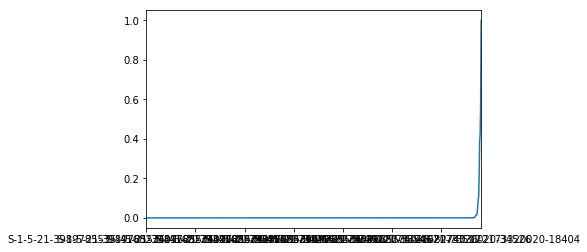

'READ-GRANTED-size-mean'

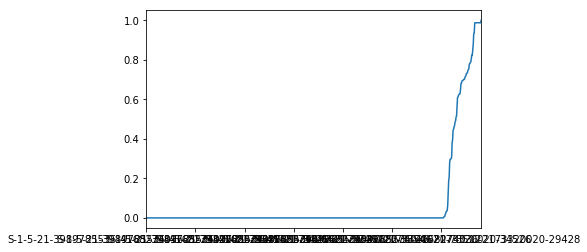

'WRITE-GRANTED-size-min'

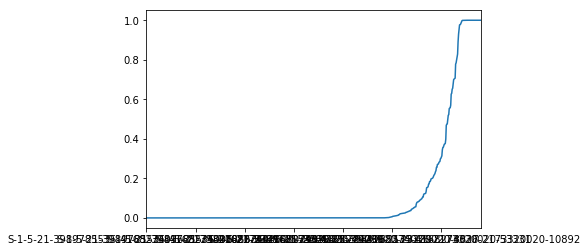

'WRITE-GRANTED-path-med'

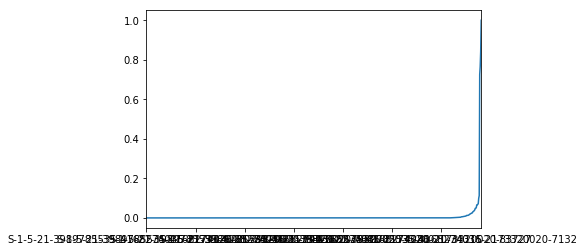

'READ-GRANTED-size-max'

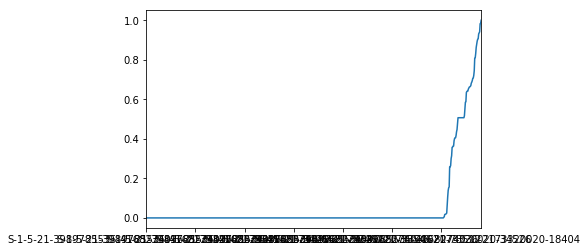

'WRITE-GRANTED-size-mean'

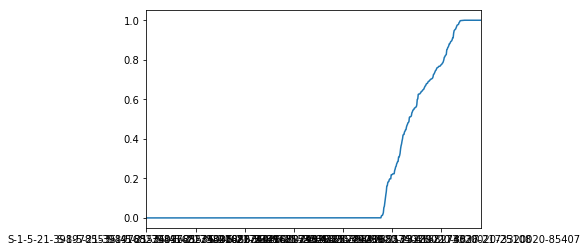

'READ-GRANTED-size-min'

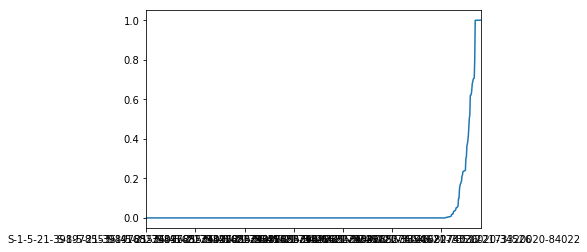

'READ-DENIED-path-med'

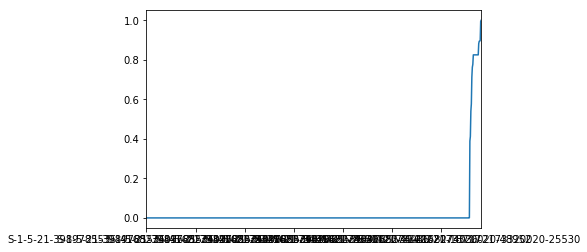

'READ-DENIED-path-min'

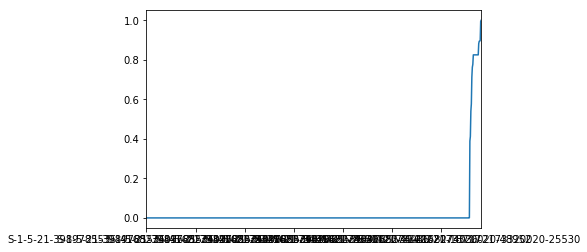

'READ-GRANTED-path-mean'

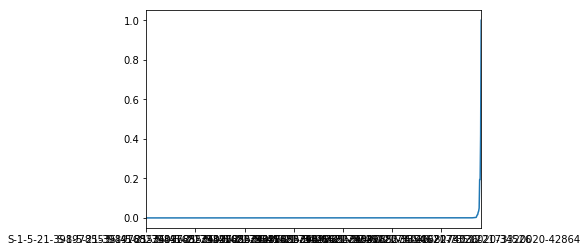

'WRITE-GRANTED-path-min'

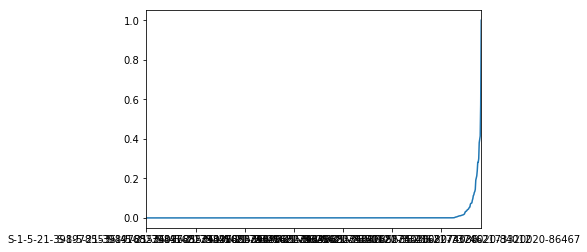

'READ-GRANTED-path-med'

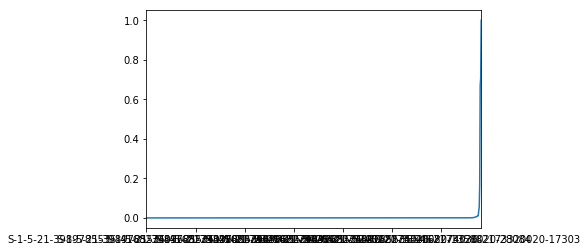

'WRITE-GRANTED-size-max'

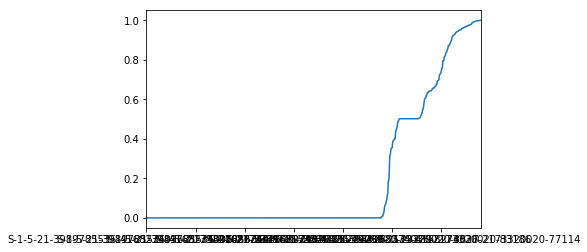

'devs'

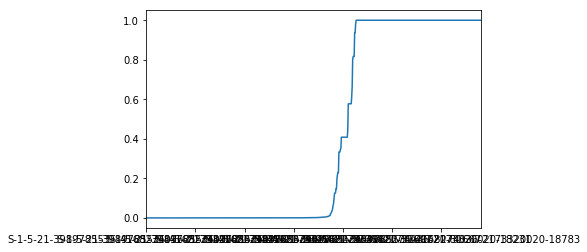

'READ-GRANTED-path-min'

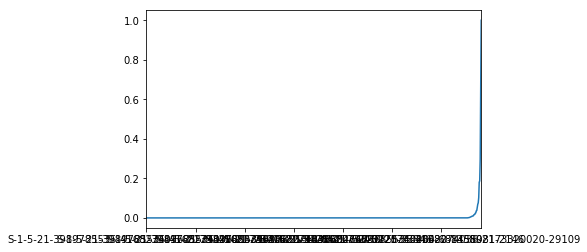

'WRITE-DENIED-path-min'

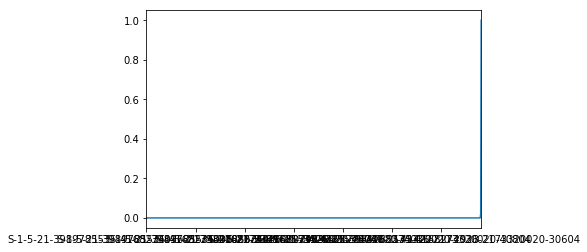

'exts'

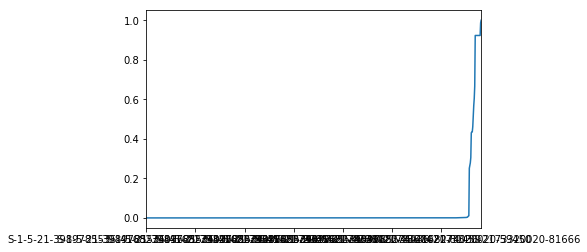

'READ-GRANTED-size-med'

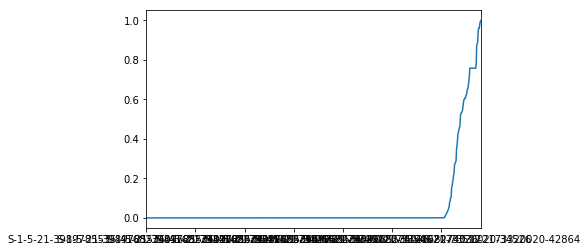

'READ-DENIED-path-max'

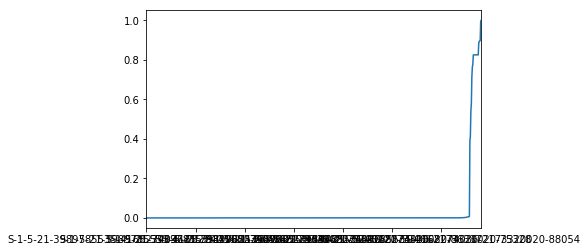

'READ-DENIED-path-mean'

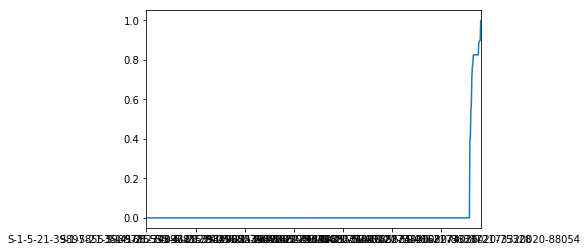

'WRITE-GRANTED-path-max'

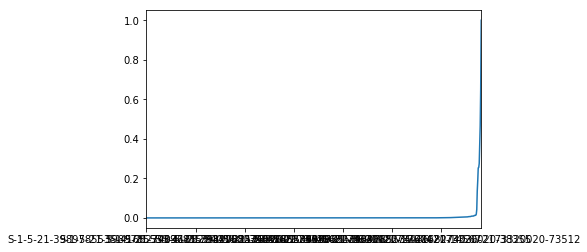

'ACCESS-max'

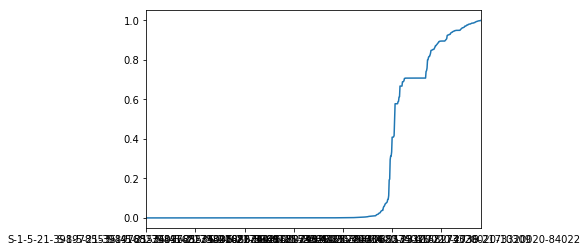

'WRITE-GRANTED-path-mean'

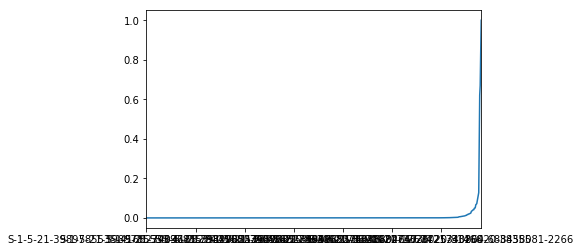

'ACCESS-mean'

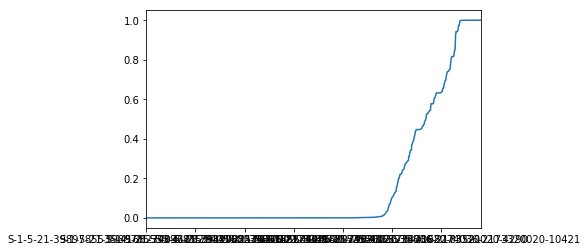

'WRITE-DENIED-path-max'

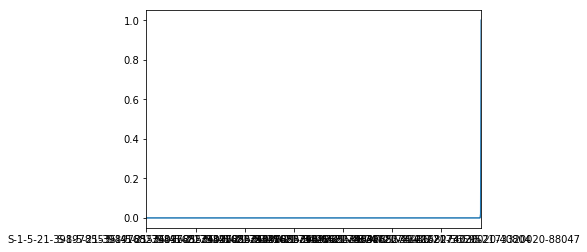

'WRITE-GRANTED-size-med'

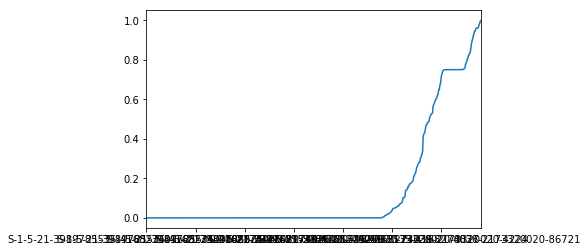

'WRITE-DENIED-path-med'

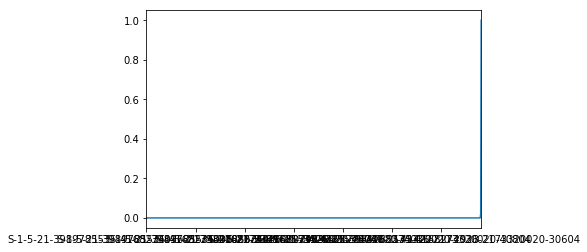

'WRITE-DENIED-path-mean'

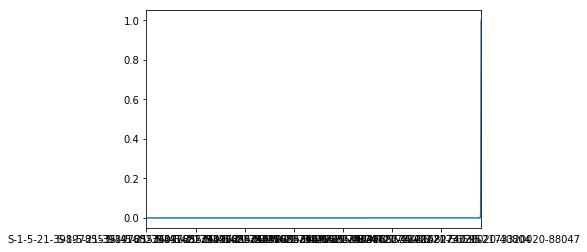

In [10]:
import sklearn.preprocessing as ppr
df2 = pd.DataFrame(df).copy(deep=True)

df2 = df2.dropna()
v = df2.values
# v_scaled = ppr.QuantileTransformer(output_distribution="normal").fit_transform(v)
v_scaled = ppr.Normalizer().fit_transform(v)
df2 = pd.DataFrame(v_scaled, columns=df2.columns, index=df2.index)

for k in scales:
    if scales[k] != 0:
        df2[k] = (df2[k]-df2[k].min())/(df2[k].max()-df2[k].min())
        df2[k].sort_values().plot()
        #plt.xticks
        display(k)
        plt.show()
df2 = df2.loc[:, (df2.sum(axis=0) != 0)]


In [11]:
from sklearn.cluster import KMeans, DBSCAN

X_init = df2.values.copy()
X = X_init.copy()
y_pred = DBSCAN(eps=0.69).fit_predict(X)
l = y_pred.max() + 1

In [15]:
for i in range(-1, y_pred.max() +1):
    print('Class', i, " --- ", y_pred.tolist().count(i))

Class -1  ---  8
Class 0  ---  221
Class 1  ---  430
Class 2  ---  23


In [266]:
for i, c in enumerate(df2.columns.tolist()):
    print(str(i).zfill(2), "---", c)

00 --- READ-GRANTED-size-min
01 --- READ-GRANTED-size-max
02 --- READ-GRANTED-size-mean
03 --- READ-GRANTED-size-med
04 --- WRITE-GRANTED-size-min
05 --- WRITE-GRANTED-size-max
06 --- WRITE-GRANTED-size-mean
07 --- WRITE-GRANTED-size-med
08 --- READ-GRANTED-path-min
09 --- READ-GRANTED-path-max
10 --- READ-GRANTED-path-mean
11 --- READ-GRANTED-path-med
12 --- WRITE-GRANTED-path-min
13 --- WRITE-GRANTED-path-max
14 --- WRITE-GRANTED-path-mean
15 --- WRITE-GRANTED-path-med
16 --- READ-DENIED-path-min
17 --- READ-DENIED-path-max
18 --- READ-DENIED-path-mean
19 --- READ-DENIED-path-med
20 --- WRITE-DENIED-path-min
21 --- WRITE-DENIED-path-max
22 --- WRITE-DENIED-path-mean
23 --- WRITE-DENIED-path-med
24 --- ACCESS-mean
25 --- ACCESS-max
26 --- exts
27 --- devs


In [486]:
favs = [(1, 6), (6, 7), (13, 22)]
# 2, 6, 24
#print('Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r')

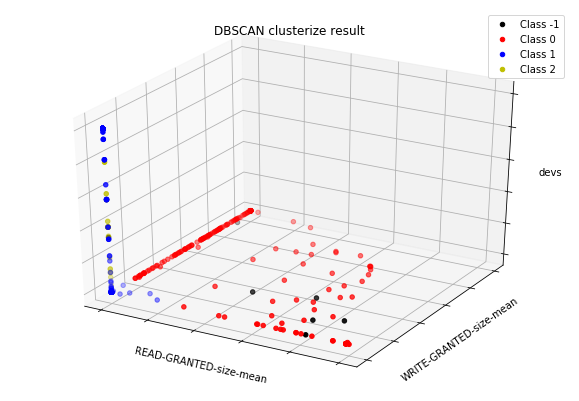

In [697]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
dims = (2, 6, 27)

for (d, color) in zip(range(-1, l), 'krbygmc'):
    ax.scatter(X[:,dims[0]][y_pred == d], X[:,dims[1]][y_pred == d], X[:,dims[2]][y_pred == d], c=color, label="Class " + str(d))

ax.set_title("DBSCAN clusterize result")
ax.set_xlabel(df2.columns[dims[0]])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(df2.columns[dims[1]])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(df2.columns[dims[2]])
ax.w_zaxis.set_ticklabels([])

plt.legend()
plt.show()

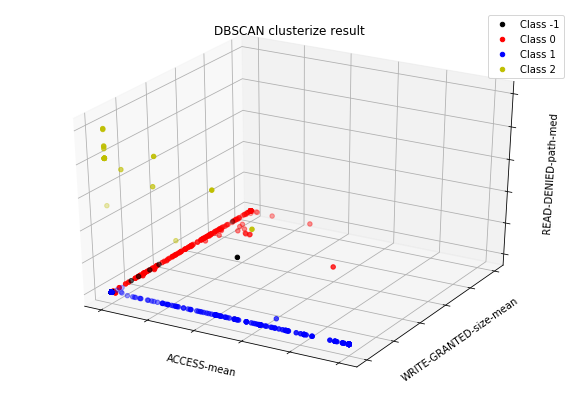

In [698]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
dims = (24, 6, 19)

for (d, color) in zip(range(-1, l), 'krbygmc'):
    ax.scatter(X[:,dims[0]][y_pred == d], X[:,dims[1]][y_pred == d], X[:,dims[2]][y_pred == d], c=color, label="Class " + str(d))

ax.set_title("DBSCAN clusterize result")
ax.set_xlabel(df2.columns[dims[0]])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(df2.columns[dims[1]])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(df2.columns[dims[2]])
ax.w_zaxis.set_ticklabels([])

plt.legend()
plt.show()

In [475]:
# dims = [(2, 2), (2, 7), (2, 14), (2, 18), (2, 22), (2, 24), (2, 26), (2, 27)]
# dims = [(i+13, j) for i,j in dims]
# 
# for d in dims:
#     plt.subplot(121)
#     plt.scatter(X_init[:,d[0]], X_init[:,d[1]], edgecolor='k')
#     plt.subplot(122)
#     plt.scatter(X[:,d[0]], X[:,d[1]], c=('r','b','y','k'))
#     print("DIMENSIONS:", df2.columns[d[0]], df2.columns[d[1]])
#     plt.show()

# for i in range(27):
#     plt.subplot(121)
#     plt.scatter(X_init[:,i], X_init[:,i+1], edgecolor='k')
#     plt.subplot(122)
#     plt.scatter(X[:,i], X[:,i+1], c=('r','b','y','k'))
#     print("DIMENSIONS:", df2.columns[i], df2.columns[i+1])
#     plt.show()

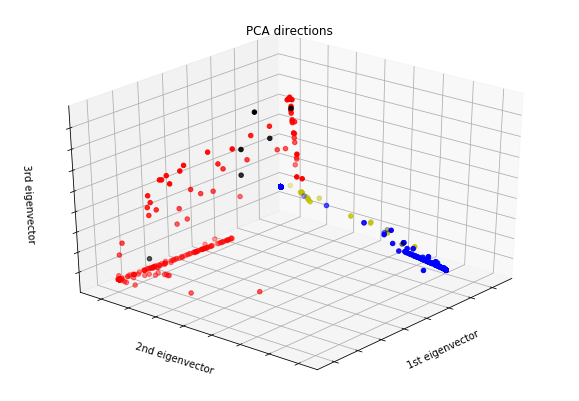

In [699]:
# pca okay

from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
t = pca.fit_transform(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d', elev=30, azim=40)


for (d, color) in zip(range(-1, l), 'krbygmc'):
    ax.scatter(t[:,0][y_pred == d], t[:,1][y_pred == d], t[:,2][y_pred == d], c=color, label="Class " + str(d))

ax.set_title("PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


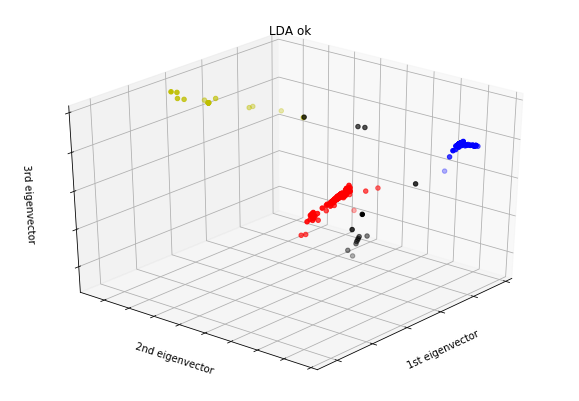

array([  5.04144363e-02,   8.08433116e-01,   4.48555168e-01,
         2.82426146e-01,   8.13619121e-02,   4.89844577e-01,
         2.61344324e-01,   1.83087383e-01,   0.00000000e+00,
         4.21331275e-01,   1.94367355e-01,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   6.20692524e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         8.33086003e-04,   7.14098600e-02,   1.69270962e-03,
         1.24786058e-04])

In [651]:
#well lda

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
t = LDA(n_components=3).fit_transform(X, y_pred)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d', elev=30, azim=40)

for (d, color) in zip(range(-1, l), 'krbygmc'):
    ax.scatter(t[:,0][y_pred == d], t[:,1][y_pred == d], t[:,2][y_pred == d], c=color, label="Class " + str(d))

ax.set_title("LDA ok")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
X[y_pred == -1][1]

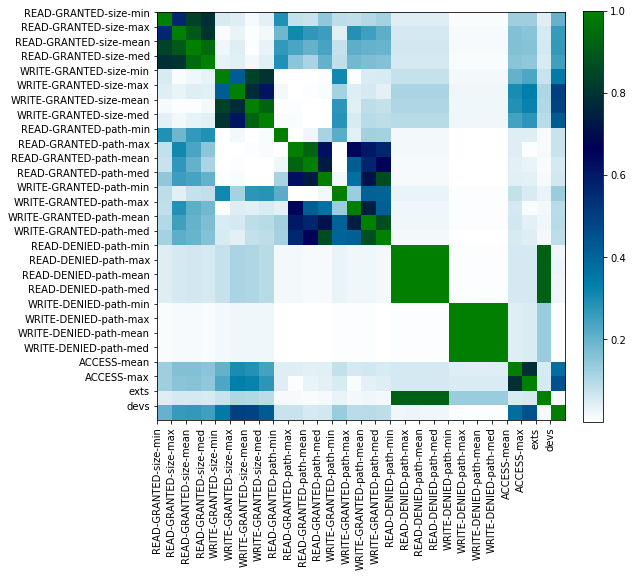

In [703]:
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(111)
df_len = df2.columns.size
xtickNames = ax.set_xticklabels(df2.columns[:])
plt.setp(xtickNames, rotation=90)
xtickNames = ax.set_yticklabels(df2.columns[:])
#plt.setp(xtickNames)

ax.set_xticks(range(df_len))
ax.set_yticks(range(df_len))
# cmap = 'Blues', "ocean", "Set1" is ok
cax = ax.imshow(df2.ix[:, :].corr().abs(), extent=[0,df_len,df_len,0], interpolation='none', cmap='ocean_r')
cbar = figure.colorbar(cax, fraction=0.046, pad=0.04)

plt.show()

In [ ]:
X_init = df2.values.copy()
X = X_init.copy()
y_pred = DBSCAN(eps=0.65).fit_predict(X)
l = y_pred.max() + 1

In [20]:
displayall(df2.iloc[np.where(y_pred == 2)])

,READ-GRANTED-size-min,READ-GRANTED-size-max,READ-GRANTED-size-mean,READ-GRANTED-size-med,WRITE-GRANTED-size-min,WRITE-GRANTED-size-max,WRITE-GRANTED-size-mean,WRITE-GRANTED-size-med,READ-GRANTED-path-min,READ-GRANTED-path-max,READ-GRANTED-path-mean,READ-GRANTED-path-med,WRITE-GRANTED-path-min,WRITE-GRANTED-path-max,WRITE-GRANTED-path-mean,WRITE-GRANTED-path-med,READ-DENIED-path-min,READ-DENIED-path-max,READ-DENIED-path-mean,READ-DENIED-path-med,WRITE-DENIED-path-min,WRITE-DENIED-path-max,WRITE-DENIED-path-mean,WRITE-DENIED-path-med,ACCESS-mean,ACCESS-max,exts,devs
S-1-5-21-3989785535-4168274036-2173320020-52499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,6.362844e-08,4.501165e-08,0.305151,0.044992
S-1-5-21-3989785535-4168274036-2173320020-56595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.712201,0.712201,0.712201,0.712201,0.0,0.0,0.0,0.0,1.993917e-01,5.877185e-01,0.265625,0.352478
S-1-5-21-3989785535-4168274036-2173320020-14372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776814,0.776814,0.776814,0.776814,0.0,0.0,0.0,0.0,6.796290e-02,1.923110e-01,0.434584,0.576683
S-1-5-21-3989785535-4168274036-2173320020-4606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412444,0.412444,0.412444,0.412444,0.0,0.0,0.0,0.0,2.886753e-01,6.126383e-01,0.461479,0.612373
S-1-5-21-3989785535-4168274036-2173320020-86113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540016,0.540016,0.540016,0.540016,0.0,0.0,0.0,0.0,3.779644e-07,2.673773e-07,0.604218,0.801784
S-1-5-21-3989785535-4168274036-2173320020-24991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994853,0.994853,0.994853,0.994853,0.0,0.0,0.0,0.0,1.740776e-07,1.231449e-07,0.278282,0.123091
S-1-5-21-3989785535-4168274036-2173320020-2523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.898025,0.898025,0.898025,0.898025,0.0,0.0,0.0,0.0,1.571348e-07,1.111593e-07,0.251197,0.444444
S-1-5-21-3989785535-4168274036-2173320020-30611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762188,0.762188,0.762188,0.762188,0.0,0.0,0.0,0.0,4.445541e-01,5.031741e-01,0.568535,0.125739
S-1-5-21-3989785535-4168274036-2173320020-84012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.893744,0.893744,0.893744,0.893744,0.0,0.0,0.0,0.0,2.085144e-07,1.475060e-07,1.000000,0.147442
S-1-5-21-3989785535-4168274036-2173320020-79415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577302,0.577302,0.577302,0.577302,0.0,0.0,0.0,0.0,6.060915e-01,6.669562e-01,0.430624,0.095238


(23, 28)

In [37]:
#
df.loc[:, (df.sum(axis=0) != 0)]

,READ-GRANTED-size-min,READ-GRANTED-size-max,READ-GRANTED-size-mean,READ-GRANTED-size-med,WRITE-GRANTED-size-min,WRITE-GRANTED-size-max,WRITE-GRANTED-size-mean,WRITE-GRANTED-size-med,READ-GRANTED-path-min,READ-GRANTED-path-max,...,READ-DENIED-path-mean,READ-DENIED-path-med,WRITE-DENIED-path-min,WRITE-DENIED-path-max,WRITE-DENIED-path-mean,WRITE-DENIED-path-med,ACCESS-mean,ACCESS-max,exts,devs
S-1-5-21-3989785535-4168274036-2173320020-73776,217015,4.65429e+07,1.59463e+07,1.22802e+07,0,0,0,0,0,1752,...,0,0,0,0,0,0,0.588311,2023,7,1
S-1-5-21-3989785535-4168274036-2173320020-4415,2.05897e+07,5.81363e+07,3.86769e+07,3.73048e+07,0,0,0,0,644,1211,...,0,0,0,0,0,0,0.499115,1235,40,2
S-1-5-21-3989785535-4168274036-2173320020-86715,4096,1.3009e+08,8.4901e+06,518144,40960,9.22045e+08,1.46197e+08,1.14775e+08,0,169,...,0,0,0,0,0,0,2.46628,1417,11,3
S-1-5-21-3989785535-4168274036-2173320020-15220,2022,29769,16698,18303,33998,1.00067e+06,617981,819279,44,328,...,0,0,0,0,0,0,0.140781,63,8,3
S-1-5-21-3989785535-4168274036-2173320020-31967,202,6390,1820.44,1494,326,3912,1047.15,978,0,89,...,0,0,0,0,0,0,4.72064,572,6,1
S-1-5-21-3989785535-4168274036-2173320020-10740,828,7408,3199.86,2660,326,2934,1513.57,1304,0,137,...,0,0,0,0,0,0,1.8703,608,6,1
S-1-5-21-3989785535-4168274036-2173320020-29115,0,0,0,0,1.49686e+08,1.4972e+08,1.49703e+08,1.4972e+08,0,0,...,0,0,0,0,0,0,0.614401,384,34,1
S-1-5-21-3989785535-4168274036-2173320020-86330,1643,4.08823e+06,834995,82683,82683,2.26327e+08,2.02796e+07,3.12913e+06,0,14,...,0,0,0,0,0,0,24.814,6117,23,2
S-1-5-21-3989785535-4168274036-2173320020-1156,0,0,0,0,42,84,79.9024,84,0,0,...,0,0,0,0,0,0,31.4627,54,0,1
S-1-5-21-3989785535-4168274036-2173320020-10160,634,2682,1844.4,1946,326,978,749.8,978,0,54,...,0,0,0,0,0,0,29.4196,3215,5,1


In [12]:
users[users['READ-DENIED'] == 1]['LocalDateTime']

345      2017-01-17 09:52:39
346      2017-01-17 09:52:39
742      2017-01-17 09:54:09
776      2017-01-17 09:55:06
778      2017-01-17 09:56:41
808      2017-01-17 09:54:20
809      2017-01-17 09:54:20
810      2017-01-17 09:54:20
811      2017-01-17 09:54:20
812      2017-01-17 09:56:33
813      2017-01-17 09:56:33
814      2017-01-17 09:56:33
815      2017-01-17 09:56:33
911      2017-01-17 09:55:03
1226     2017-01-17 09:58:34
1227     2017-01-17 09:58:37
1228     2017-01-17 09:58:37
1286     2017-01-17 08:34:13
1492     2017-01-17 09:58:30
1592     2017-01-17 10:01:50
1679     2017-01-17 10:01:35
2602     2017-01-17 10:01:32
2603     2017-01-17 10:01:34
2604     2017-01-17 10:01:34
3093     2017-01-17 10:01:08
3094     2017-01-17 10:01:08
3095     2017-01-17 10:01:10
3097     2017-01-17 10:01:19
3470     2017-01-17 10:00:42
4264     2017-01-17 10:01:27
                ...         
38290    2017-01-17 13:01:54
38388    2017-01-17 13:02:44
38486    2017-01-17 13:03:35
38710    2017-

In [10]:
sids.index('S-1-5-21-1183061375-2181464864-3048346609-1043')
#df['S-1-5-21-1183061375-2181464864-3048346609-1043']

22

In [2]:
#init all ok
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def displayall(_, col=99, row=999):
    pd.options.display.max_columns = col
    pd.options.display.max_rows = row
    display(_)
    display(_.shape)
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 60
    
gpb = pd.read_csv("./LDC_Intellinx_40000-hashed.csv", sep=";", error_bad_lines=False, encoding="cp1251")
path = gpb['Data_path'].str.split(pat=r'[/\\\.]')
gpb['ext'] = path.map(lambda x: x if type(x) != list else x[-1].lower() if len(x[-1]) < 6 else "no_ext")
gpb['path'] = path.map(lambda x: x if type(x) != list else x[:-1] if len(x) >1 else x)
def s(string):
    _ = string.split('-')
    return list(reversed([_[-1], '-'.join(_[4:7]), '-'.join(_[:4])]))

u = gpb.loc[~gpb.UserSID.isin(["S-1-5-" + i for i in ["18", "19", "20"]])]['UserSID'].value_counts().index.values
users = gpb[gpb.UserSID.isin(u)]
users = users[pd.notnull(users['UserSID'])]
new = pd.DataFrame(users['UserSID'])
users.UserSIDlist = users.UserSID.map(lambda x: s(x))
new[['auth', 'domain', 'relative']] = pd.DataFrame(users.UserSIDlist.values.tolist(), index = new.index)
users[['auth', 'domain', 'relative']] = new[['auth', 'domain', 'relative']]
users['relative'] = pd.to_numeric(users['relative'])
users = users.join(pd.get_dummies(users.ActionName))
sids = users['UserSID'].value_counts().index.tolist()

b'Skipping line 916: expected 23 fields, saw 24\n'


In [ ]:
import time
while True:
    time.sleep(1)

In [2]:
print(1)

1


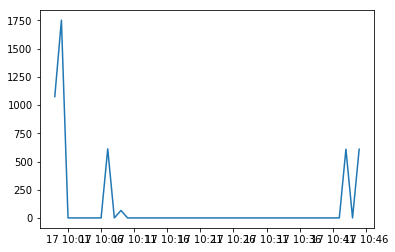

In [5]:
#keep this
u = users[users.UserSID == 'S-1-5-21-3989785535-4168274036-2173320020-73776']
ut = u.set_index(pd.DatetimeIndex(u.LocalDateTime))
ut = ut.groupby(pd.TimeGrouper(freq='60s')).count() # god damn right
plt.plot(ut.index, ut.EntryID.values)
plt.show()